<a href="https://colab.research.google.com/github/AmiTamakuwala/Music_Recommendation/blob/master/KKBoxMusicReco_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WSDM - KKBox's Music Recommendation Challenge

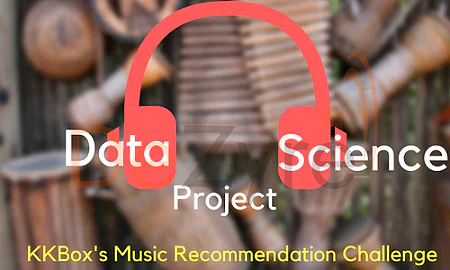

Music Recommendation Systems are a specific type of Recommendation Systems which predicts user preferences and recommend songs to the user based on multiple factors. The number of songs available exceeds the listening capacity of an individual in their lifetime, & is constantly exceeding day by day. It is tedious for an individual to sometimes to choose from millions of songs and there is also a good chance missing out on songs which could have been the favorites.

KKBOX provides a training data set which consists of information of the first observable listening event for each unique user-song pair within a specific time duration. Metadata of each unique user and song pair is also provided.

# Table:



### 1. **main.csv:**
- msno: user id
- song_id: song id
- source_system_tab: the name of the tab where the event was triggered. System tabs are used to categorize KKBOX mobile apps functions. For example, tab my library contains functions to manipulate the local storage, and tab search contains functions relating to search.
- source_screen_name: name of the layout a user sees.
- source_type: an entry point a user first plays music on mobile apps. An entry point could be album, online-playlist, song .. etc.
- target: this is the target variable. target=1 means there are recurring listening event(s) triggered within a month after the user’s very first observable listening event, target=0 otherwise .

### **2.  songs.csv:**

The songs. Note that data is in unicode.

- song_id

- song_length: in ms

- genre_ids: genre category. Some songs have multiple genres and they are separated by |

- artist_name

- composer

- lyricist

- language

### 3. **members.csv**
 
user information.
- msno
- city
- bd: age. Note: this column has outlier values, please use your judgement.
- gender
- registered_via: registration method
- registration_init_time: format %Y%m%d
- expiration_date: format %Y%m%d





## **Importing Libraries**:

In [ ]:
!pip install mlfoundry --upgrade 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import mlfoundry as mlf

#TRACKING_URL = "https://projectpro.truefoundry.com"
#mlf_api = mlf.get_client(TRACKING_URL)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mlfoundry as mlf

In [ ]:
import zipfile
from zipfile import ZipFile
import urllib.request
from io import BytesIO
folder = urllib.request.urlopen("https://s3.amazonaws.com/projex.dezyre.com/Build%20a%20Music%20Recommendation%20Algorithm%20using%20KKBox's%20Dataset/materials/data.zip")
zipfile = ZipFile(BytesIO(folder.read()))
zipfile.namelist()

['data/members.csv.7z', 'data/main.csv.7z', 'data/songs.csv.7z']

# main dataset(train dataset):

In [ ]:
# loading our train_dataset:

train_music = pd.read_csv("https://s3.amazonaws.com/projex.dezyre.com/music-recommendation-challenge/materials/train.csv")
train_music.rename(columns = {'msno'  : 'user_id'}, inplace=True) # renaming column for better understanding.
train_music.head()

,user_id,song_id,source_system_tab,source_screen_name,source_type,target
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1


## Exploring the Dataset:

### Train_data:

In [ ]:
print("Length of the Dataset: ", len(train_music))

def unique_in_the_column(data):
    """
    This function will return length of the unique values in the respective columns
    """
    for col in data.columns:
        print("Unique ", col, ":", len(data[col].unique()))

# getting unique values of the columns in train_data:
unique_in_the_column(train_music)


Length of the Dataset:  7377418
Unique  user_id : 30755
Unique  song_id : 359966
Unique  source_system_tab : 9
Unique  source_screen_name : 21
Unique  source_type : 13
Unique  target : 2


In [ ]:
train_music.describe(include = 'all')

,user_id,song_id,source_system_tab,source_screen_name,source_type,target
count,7377418,7377418,7352569,6962614,7355879,7.377418e+06
unique,30755,359966,8,20,12,NaN
top,MXIMDXO0j3UpaT7FvOSGW6Y5zfhlh+xYjTqGoUdMzEE=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,NaN
freq,5819,13973,3684730,3228202,2261399,NaN
mean,NaN,NaN,NaN,NaN,NaN,5.035171e-01
std,NaN,NaN,NaN,NaN,NaN,4.999877e-01
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,0.000000e+00
50%,NaN,NaN,NaN,NaN,NaN,1.000000e+00
75%,NaN,NaN,NaN,NaN,NaN,1.000000e+00


In [ ]:
print("Total Null values in the train_dataset:\n", train_music.isnull().sum())

Total Null values in the train_dataset:
 user_id                    0
song_id                    0
source_system_tab      24849
source_screen_name    414804
source_type            21539
target                     0
dtype: int64


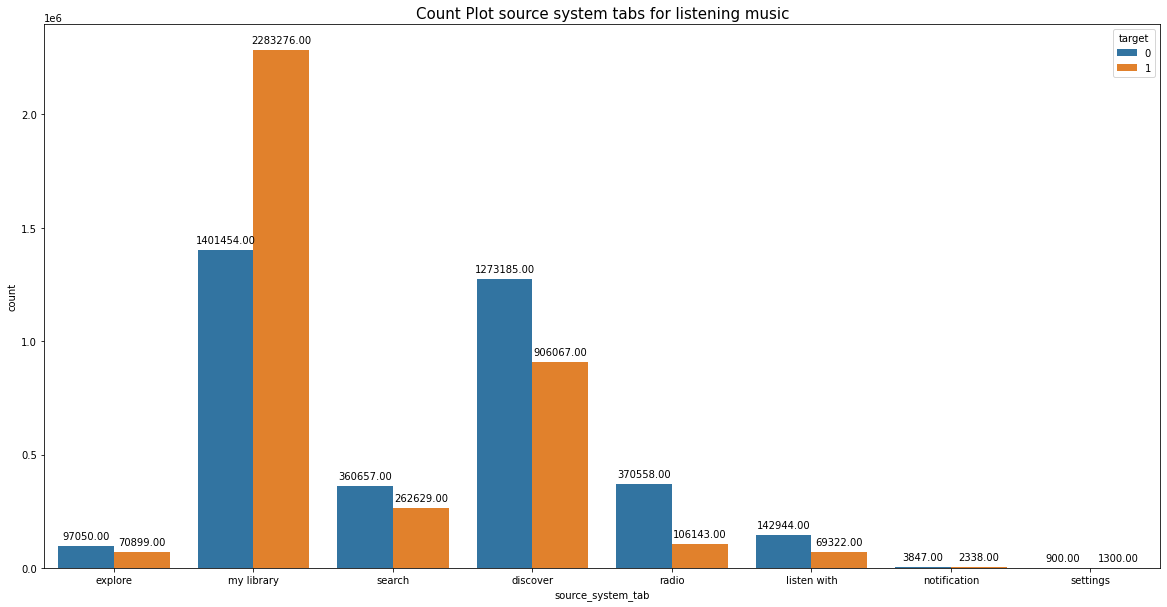

In [ ]:
# creating plot for "source_system_tab":
plt.figure(figsize = (20,10))
plot = sns.countplot(x='source_system_tab', data = train_music, hue = 'target')
plt.title('Count Plot source system tabs for listening music', fontsize = 15)

for p in plot.patches:
  plot.annotate(format(p.get_height(), ".2f"),
                (p.get_x() + p.get_width() / 2. ,
                p.get_height()),
                ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points' )

Insights:
- Users listen to more songs from my library which are stored in their library.
- Songs stores in the library are the ones which users tends to listen again in a given time frame, other than that all other sources are less likely to be used.

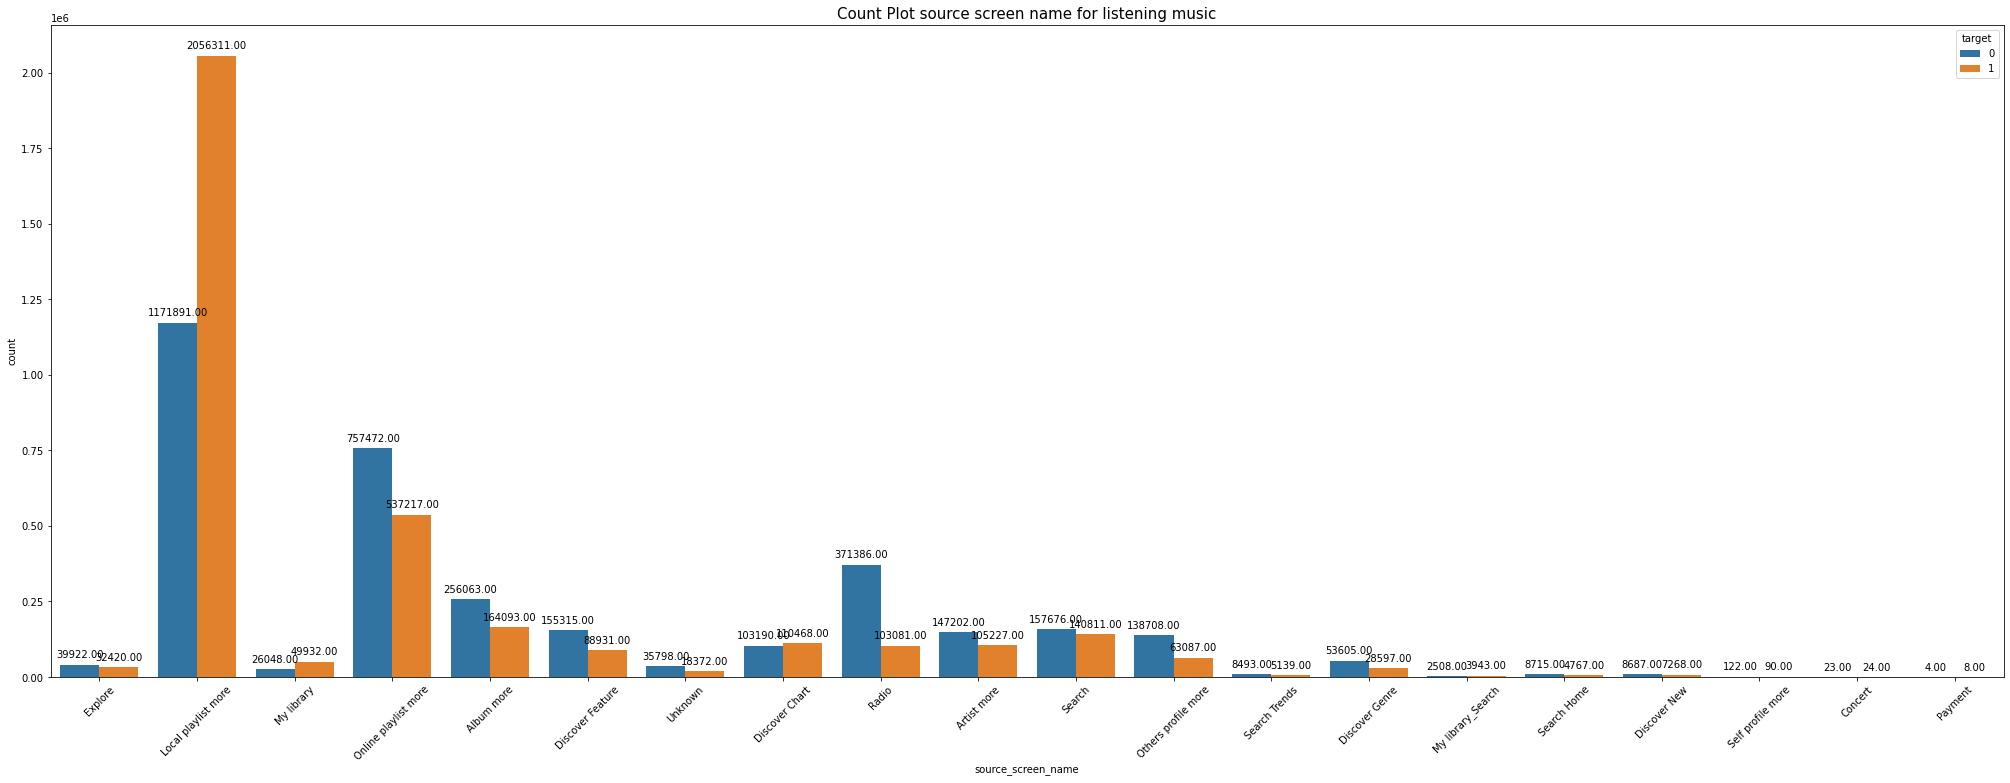

In [ ]:
# creating plot for "source_screen_name"

plt.figure(figsize=(35,12))
plot = sns.countplot(x = 'source_screen_name', data = train_music, hue = 'target')
plt.title("Count Plot source screen name for listening music", fontsize=15)
plt.xticks(rotation = '45')

for p in plot.patches:
  plot.annotate(format(p.get_height(), ".2f"),
                (p.get_x()+ p.get_width() / 2. ,
                p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = "offset points")

Insights:
- Local playlist is most visited screen for users to listen to music.

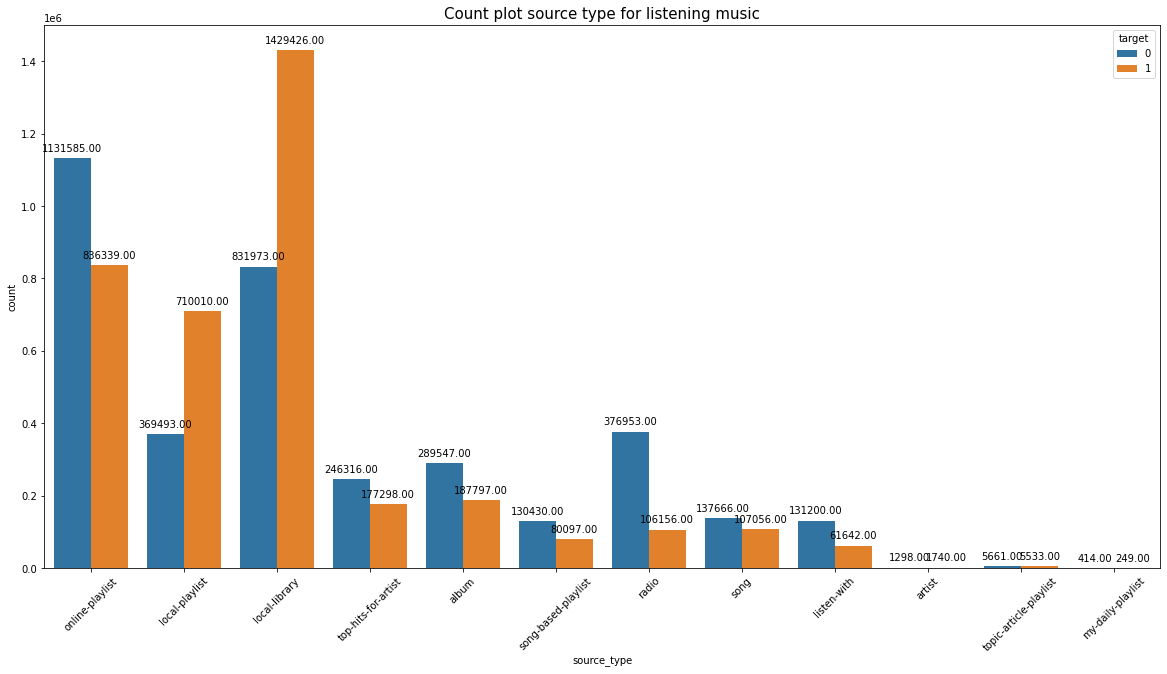

In [ ]:
# creating plot for "source_type" :

plt.figure(figsize = (20,10))
plot = sns.countplot(x = 'source_type', data = train_music, hue = 'target')
plt.title("Count plot source type for listening music", fontsize = 15)
plt.xticks(rotation = '45')

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2. ,
                 p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Insights:
- Local-library is most visited source type for users to listen to songs.
- Local-library is the place where user visit to listen to songs again, other than that other source type are less likely to be visited.

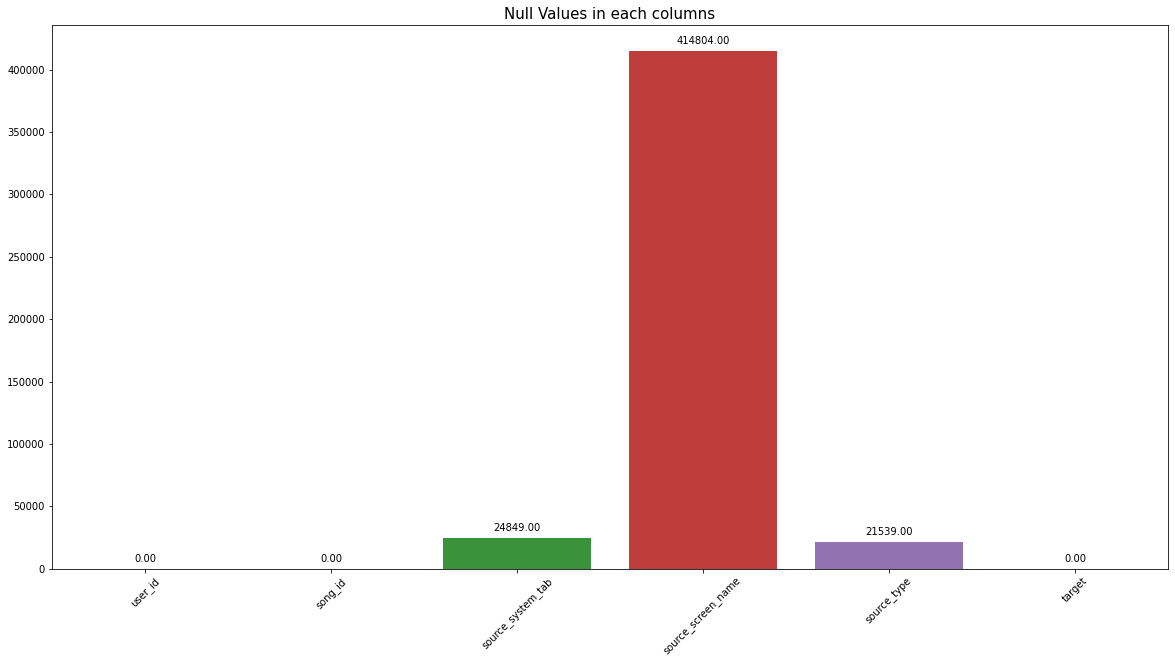

In [ ]:
# creating plot for null values in each columns:

plt.figure(figsize = (20,10))
plot = sns.barplot(x = train_music.columns, y = train_music.isnull().sum())
plt.title("Null Values in each columns", fontsize = 15)
plt.xticks(rotation = '45')

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2. ,
                 p.get_height()),
                ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

Insights:
- "source_screen_name" has the most numbers of null values.
- It is almost 4.1m null values in "source_screen_name" column.

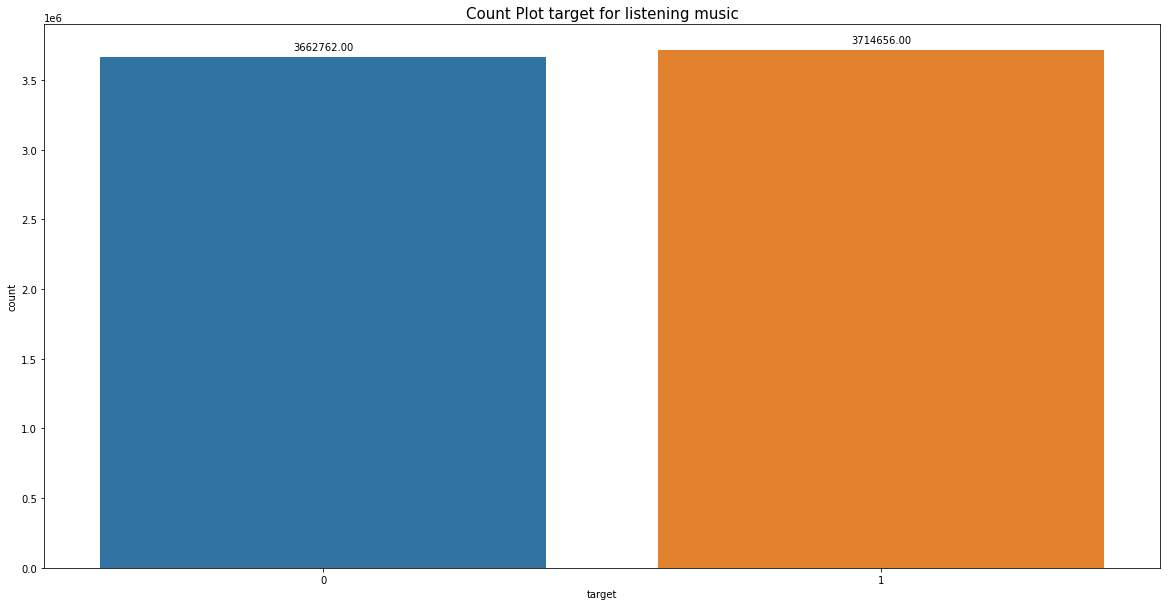

In [ ]:
# creating plot for 'target' column.

plt.figure(figsize = (20,10))
plot = sns.countplot(x = 'target', data = train_music)
plt.title("Count Plot target for listening music", fontsize = 15)

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2.,
                 p.get_height()),
                ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

- Both target have almost smae size in dataset.

# songs dataset:

In [ ]:
# importing songs.csv file:

songs_data = pd.read_csv("/content/songs_10k.csv")
songs_data.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,å¼µä¿¡å“² (Jeff Chang),è‘£è²ž,ä½•å•Ÿå¼˜,3
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,æ¹¯å°åº·,å¾ä¸–ç,3
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,è²´æ—ç²¾é¸,Traditional,Traditional,52


In [ ]:
# getting unique values of the columns in songs_data:

unique_in_the_column(songs_data)

Unique  song_id : 10000
Unique  song_length : 6619
Unique  genre_ids : 210
Unique  artist_name : 5231
Unique  composer : 4511
Unique  lyricist : 2170
Unique  language : 10


In [ ]:
# missing values in the data:

print("Length of the song_data:", len(songs_data))
print("Total Null Values in the song_dataset: \n", songs_data.isnull().sum())

Length of the song_data: 10000
Total Null Values in the song_dataset: 
 song_id           0
song_length       0
genre_ids       182
artist_name       0
composer       4211
lyricist       7163
language          0
dtype: int64


In [ ]:
# combining train data & song data to visualize 'language':

combined_train_songs_data = pd.merge(train_music, songs_data, on = 'song_id')

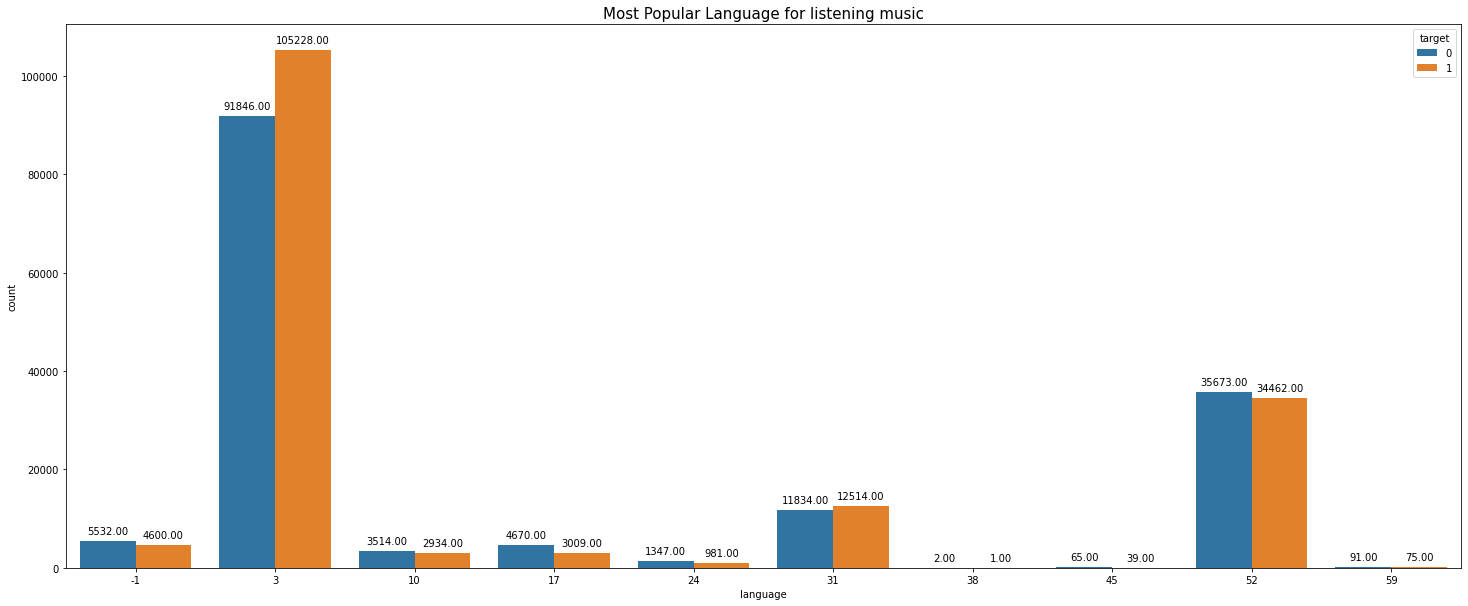

In [ ]:
# creating plot for 'language' which we merge with train_music & 'songs_data':

plt.figure(figsize=(25,10))
plot = sns.countplot(x = 'language', data = combined_train_songs_data, hue = 'target')
plt.title("Most Popular Language for listening music", fontsize = 15)

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2.,
                p.get_height()),
                ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

insight:
- language 3 is the most listening language in music by users.

# Members Data:

In [ ]:
# importing members dataset:

members1_data = pd.read_csv("/content/members.csv")
members1_data.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


In [ ]:
# or we can load members_data from "amazonaws":

members_data = pd.read_csv("https://s3.amazonaws.com/projex.dezyre.com/music-recommendation-challenge/materials/members.csv")

# renaming column name for better undersatnding:
members_data.rename(columns={"msno" : "user_id"}, inplace = True)

members_data.head()

,user_id,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


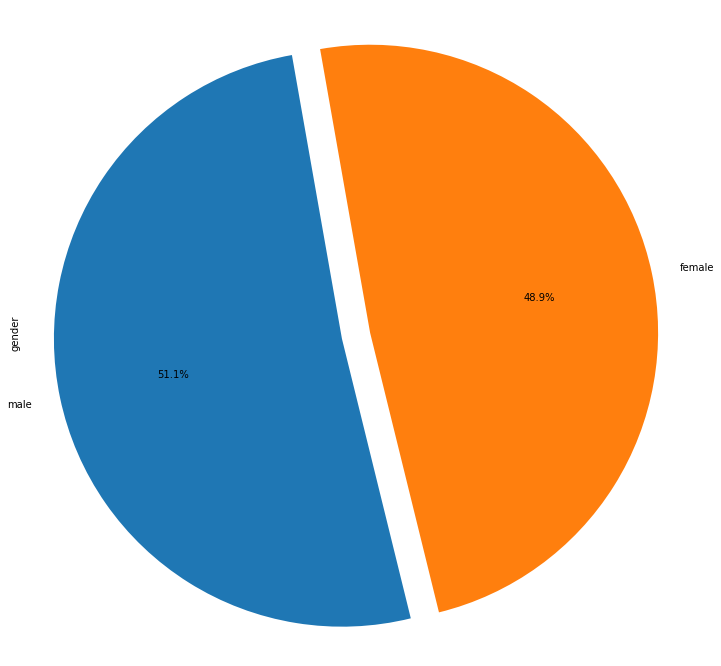

In [ ]:
# visuallizing pie plot for'gender' column from members_data:

plt.figure(figsize=(12, 12))
pp = pd.value_counts(members_data.gender)
pp.plot.pie(startangle = 100, autopct = '%3.1f%%', shadow = False, explode = (0.05, 0.05))
plt.axis('equal')
plt.show()


In [ ]:
# now focusing on datetime in "registration_init_time" column & "expiration_date" from members_data:
# extracting year, month and column from the string in "registration_init_time" and "expiration_date":

members_data["registration_year"] = members_data["registration_init_time"].apply(lambda x : int(str(x)[0:4]))
members_data["registration_expire_year"] = members_data["expiration_date"].apply(lambda x : int(str(x)[0:4]))

members_data['registraion_month'] = members_data['registration_init_time'].apply(lambda x: int(str(x)[4:6]))
members_data['expiration_month'] = members_data['expiration_date'].apply(lambda x: int(str(x)[4:6]))

members_data['registration_date'] = members_data['registration_init_time'].apply(lambda x: int(str(x)[6:]))
members_data['registration_expiration_date'] = members_data['expiration_date'].apply(lambda x: int(str(x)[6:]))

members_data.drop(['registration_init_time', 'expiration_date'],axis = 1, inplace=True)

members_data.head()

,user_id,city,bd,gender,registered_via,registration_year,registration_expire_year,registraion_month,expiration_month,registration_date,registration_expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,2011,2017,8,9,20,20
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,2015,2017,6,6,28,22
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,2016,2017,4,7,11,12
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,2015,2015,9,9,6,7
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,2017,2017,1,6,26,13


In [ ]:
# getting unique values of the columns in songs_data:

unique_in_the_column(members_data)

Unique  user_id : 34403
Unique  city : 21
Unique  bd : 95
Unique  gender : 3
Unique  registered_via : 6
Unique  registration_year : 14
Unique  registration_expire_year : 18
Unique  registraion_month : 12
Unique  expiration_month : 12
Unique  registration_date : 31
Unique  registration_expiration_date : 31


In [ ]:
# missing values in the 'members_data':

print("Length of the members_data: ", len(members_data))
print("Total Null Values in the members_dataset:\n", members_data.isnull().sum())

Length of the members_data:  34403
Total Null Values in the members_dataset:
 user_id                             0
city                                0
bd                                  0
gender                          19902
registered_via                      0
registration_year                   0
registration_expire_year            0
registraion_month                   0
expiration_month                    0
registration_date                   0
registration_expiration_date        0
dtype: int64


In [ ]:
# combining member data and train data for better visualization:

combined_train_members_data = pd.merge(train_music, members_data, on = 'user_id')

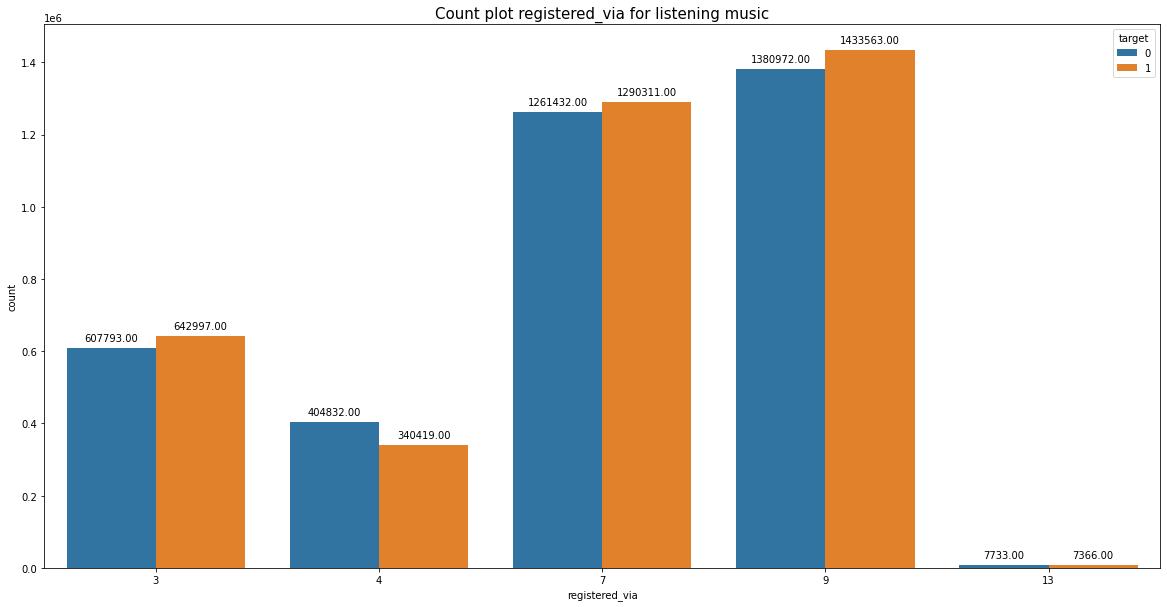

In [ ]:
# creating plot combined train & members data for most "registered_via":

plt.figure(figsize=(20,10))
plot = sns.countplot(x = 'registered_via', data = combined_train_members_data, hue = 'target')
plt.title("Count plot registered_via for listening music", fontsize=15)

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2. ,
                 p.get_height()),
                ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')


Insights:
- most regesteration were via 9 and 7.
- very few registration with 13.

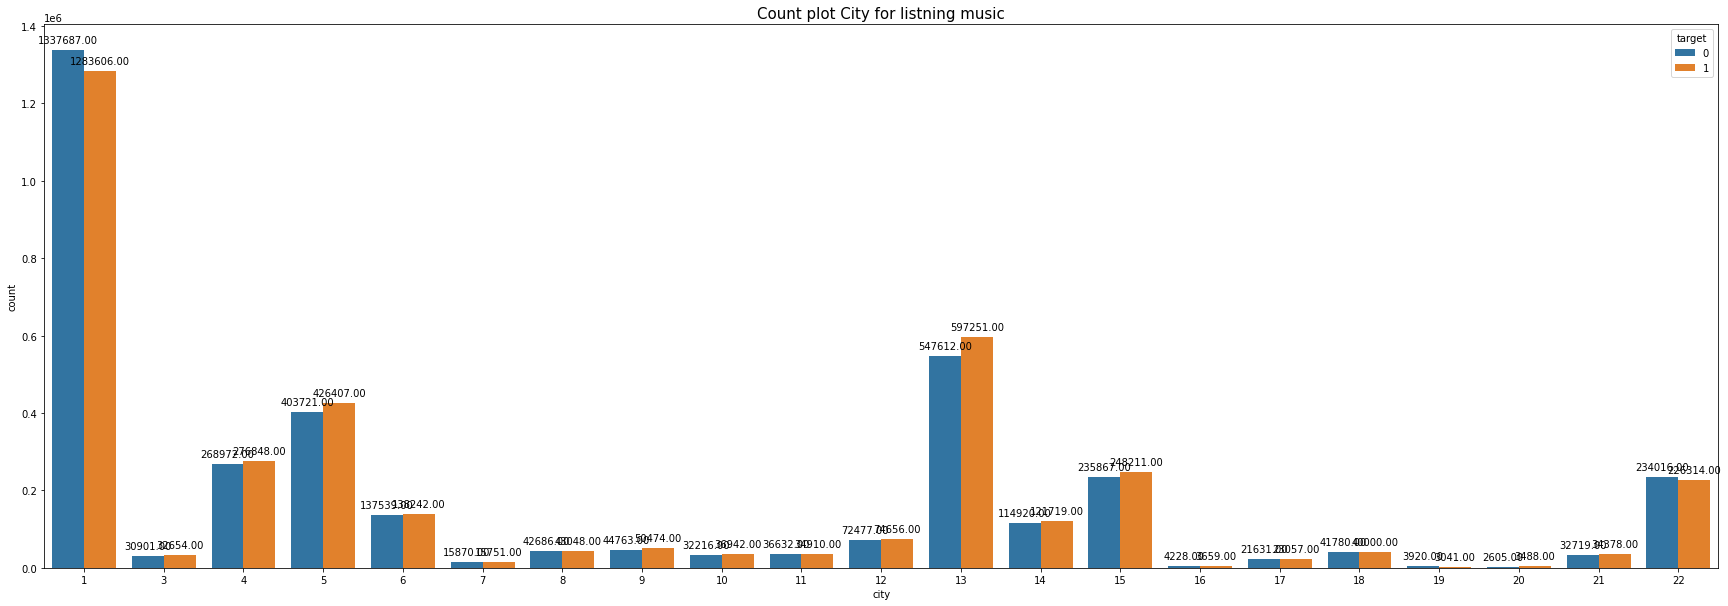

In [ ]:
# count plot for city: 

plt.figure(figsize=(30,10))
plot = sns.countplot(x='city', data = combined_train_members_data, hue = 'target')
plt.title("Count plot City for listning music", fontsize = 15)

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2. ,
                 p.get_height()),
                ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

Insights:
- People belonging from City-1 are the ones who use the app most.

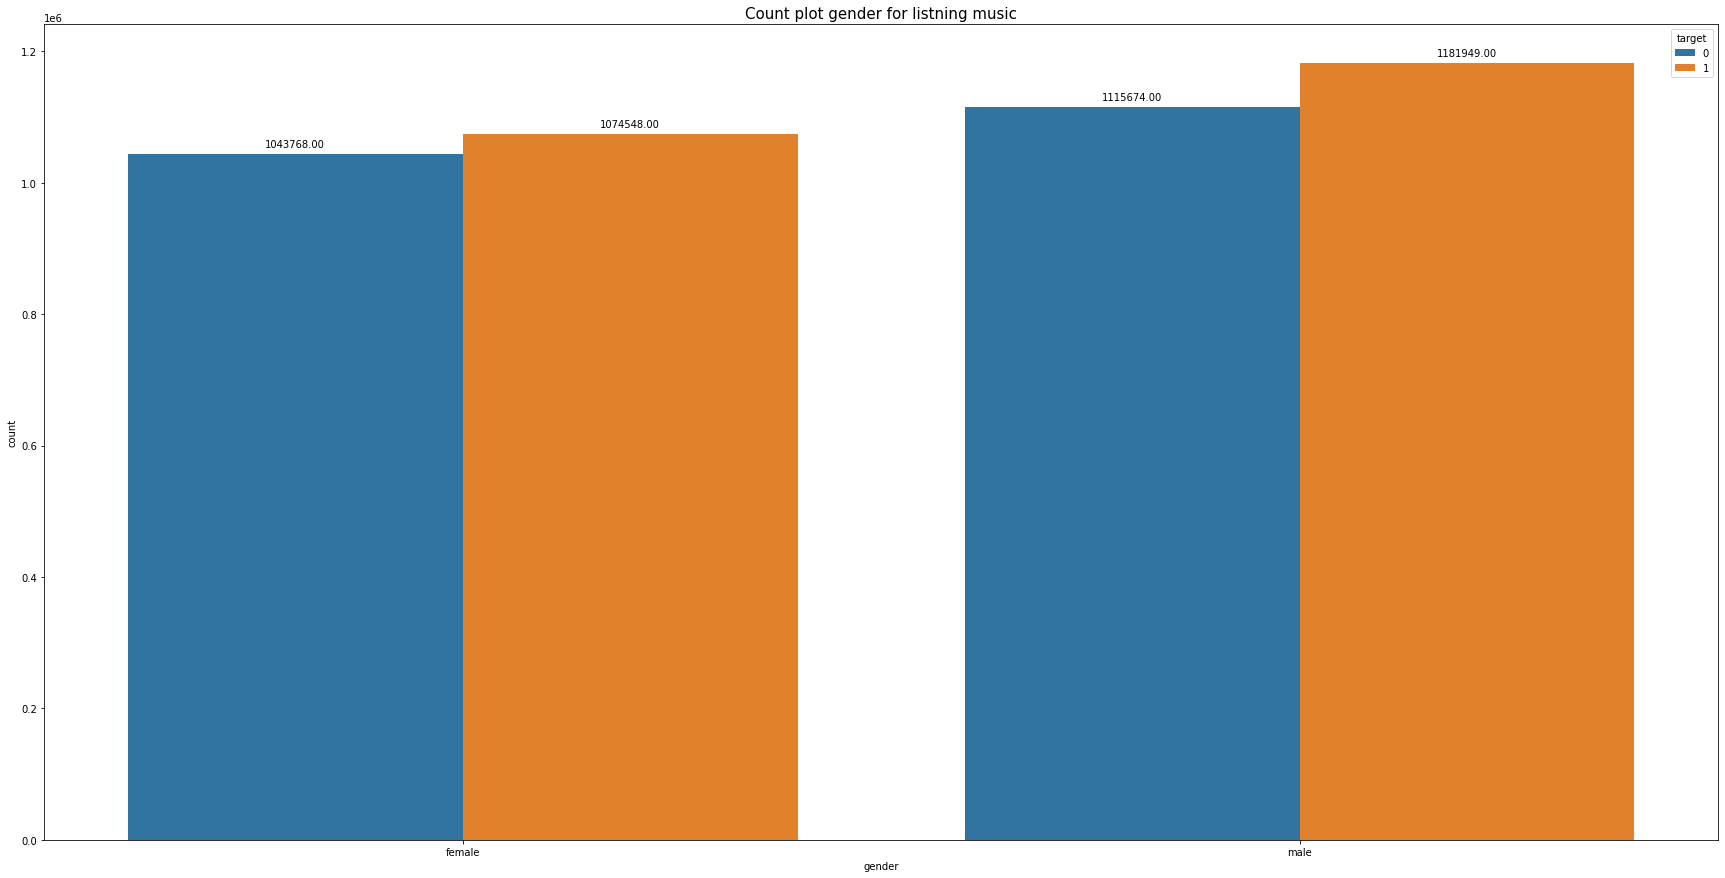

In [ ]:
# plot for gender who listning the music app most:

plt.figure(figsize = (30,15))
plot = sns.countplot(x = 'gender', data = combined_train_members_data, hue = 'target')
plt.title("Count plot gender for listning music", fontsize = 15)

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2. ,
                 p.get_height()),
                ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

Insights:
- The number of male are more in the dataset and they are more likely to listen to the same song again than females.

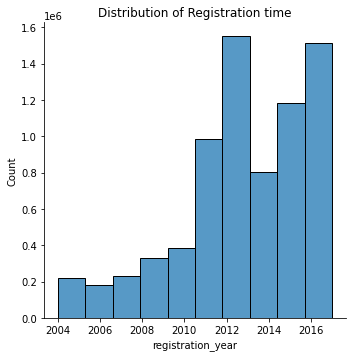

In [ ]:
# checking distribution of registration time:


sns.displot(combined_train_members_data, x = "registration_year", bins=10).set(title = "Distribution of Registration time")

# insights:
- more registration has been done from 2012 to 2016.


In [ ]:
# checking outliers through z-score:

mean_of_registration_time = np.mean(combined_train_members_data["registration_year"])
std_of_registration_time = np.std(combined_train_members_data["registration_year"])
print("Mean of Registration Time: ", mean_of_registration_time)
print("Standard Deviation of Registration Time: ", std_of_registration_time)

threshold = 3
outlier = []

for i in combined_train_members_data["registration_year"]:
  z = (i - mean_of_registration_time) / std_of_registration_time
  if z > threshold:
    outlier.append(i)
print("Total outlier in dataset are: ", len(outlier))

Mean of Registration Time:  2012.7405063668616
Standard Deviation of Registration Time:  3.0188604813273914
Total outlier in dataset are:  0


# Insights:
- There are no outliers in the dataset in term of "registration_year"

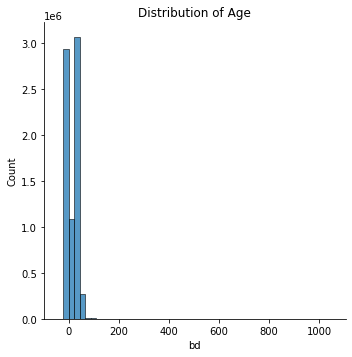

In [ ]:
# checking distribution of "bd"[age]:
# creating plot for that:

sns.displot(combined_train_members_data, x = "bd", bins = 50).set(title = "Distribution of Age")



In [ ]:
# checking outliers through z-score:

mean_of_age = np.mean(combined_train_members_data["bd"])
mode_of_age = combined_train_members_data['bd'].mode()[0]
std_of_age = np.std(combined_train_members_data['bd'])

print('Mean of Age: ',mean_of_age)
print('Mode of Age: ',mode_of_age)
print('Standard Deviation of Age: ',std_of_age)

threshold = 3
outlier = []
for i in combined_train_members_data['bd']:
  z = (i - mean_of_age) / std_of_age
  if z > threshold:
    outlier.append(i)

print("Total Outlier in dataset are: ", len(outlier))
print("Maximum Age Outlier: ", max(outlier))
print("Minimum Age Outlier: ", min(outlier))


Mean of Age:  17.539271192170485
Mode of Age:  0
Standard Deviation of Age:  21.554468765781245
Total Outlier in dataset are:  6953
Maximum Age Outlier:  1051
Minimum Age Outlier:  83


Insights:
- According to Z-Score, there are total 6953 outliers in the dataset.
- Age between 83 to 1051 are the outliers and can be removed. 

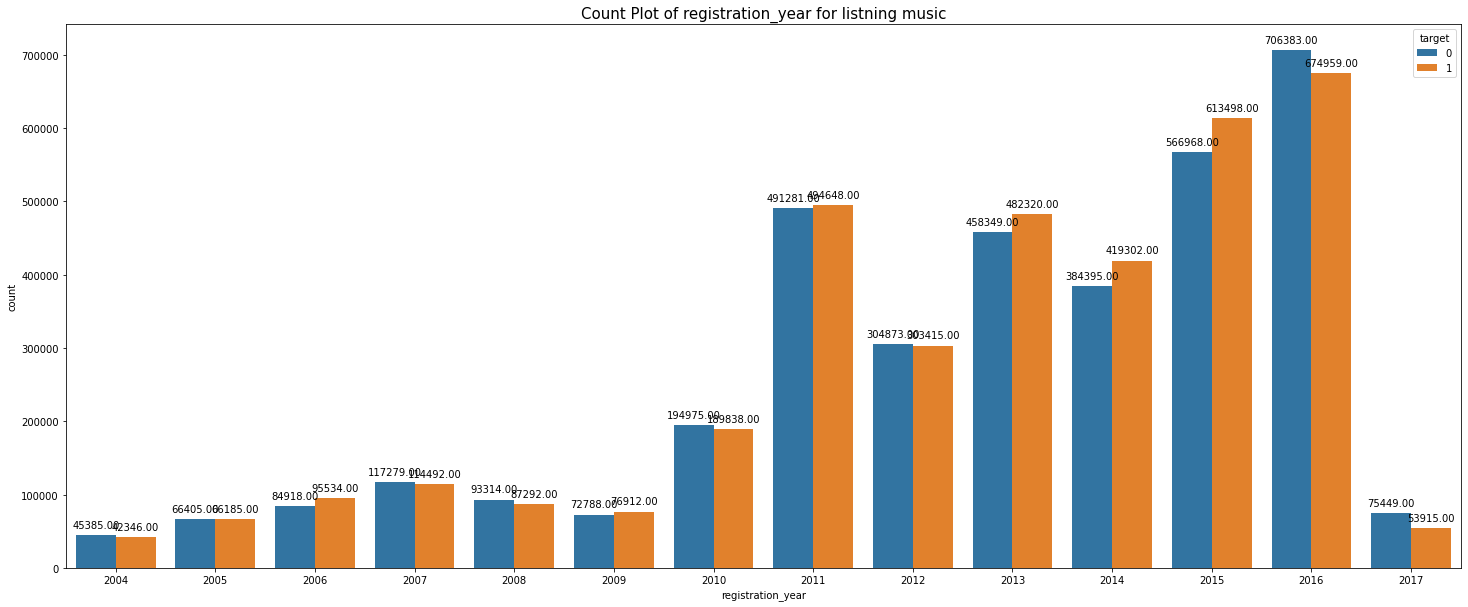

In [ ]:
# creating plot for 'registration_year':

plt.figure(figsize=(25,10))
plot = sns.countplot(x = "registration_year", data = combined_train_members_data, hue = 'target')
plt.title("Count Plot of registration_year for listning music", fontsize = 15)

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2. ,
                 p.get_height()),
                ha = 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')

Insights:
- users hase been registerd for music app most in the year of 2016.
-  And we can say that from the above plot, no matter what registration year is, the target 0 and 1 are almost balanced. 

## Feature Engineering:

### Seprating genre_ids, Artist Name, Composer, Lyricist and counting them as in a single row there are more than one.

In [ ]:
# checking 'genre_ids:

songs_data['genre_ids'].head(20)

0                 465
1                 444
2                 465
3                 465
4                 726
5     864|857|850|843
6                 458
7                 465
8                 465
9            352|1995
10               2157
11                465
12                726
13                458
14                359
15                359
16                458
17                465
18                726
19                465
Name: genre_ids, dtype: object

- as we can see above result, the 5th and 9th have two or more ids.

In [ ]:
# creating a code for adding new columns like count_of_genre_ids, count_of_artist etc: 

def counting_genre_ids_artist_composer_lyricist(data):
  count = []
  for ids in data:
    try:
      if len(ids) != 0:
        count_ids = 1
        for i in ids:
          if i == '|':
            count_ids += 1
        count.append(count_ids)
    except TypeError:
        count.append(0)
  return count

songs_data['count_of_genre_ids'] = counting_genre_ids_artist_composer_lyricist(songs_data['genre_ids'])
songs_data['count_of_artist'] = counting_genre_ids_artist_composer_lyricist(songs_data['artist_name'])
songs_data['count_of_composer'] = counting_genre_ids_artist_composer_lyricist(songs_data['composer'])
songs_data['count_of_liricist'] = counting_genre_ids_artist_composer_lyricist(songs_data['lyricist'])

songs_data.head(10)

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_liricist
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,å¼µä¿¡å“² (Jeff Chang),è‘£è²ž,ä½•å•Ÿå¼˜,3,1,1,1,1
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31,1,1,3,1
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31,1,1,0,0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,æ¹¯å°åº·,å¾ä¸–ç,3,1,1,1,1
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,è²´æ—ç²¾é¸,Traditional,Traditional,52,1,1,1,1
5,kKJ2JNU5h8rphyW21ovC+RZU+yEHPM+3w85J37p7vEQ=,235520,864|857|850|843,è²´æ—ç²¾é¸,Joe Hisaishi,Hayao Miyazaki,17,4,1,1,1
6,N9vbanw7BSMoUgdfJlgX1aZPE1XZg8OS1wf88AQEcMc=,226220,458,ä¼ä½° & China Blue,Jonathan Lee,NaN,3,1,1,1,0
7,GsCpr618xfveHYJdo+E5SybrpR906tsjLMeKyrCNw8s=,276793,465,å…‰è‰¯ (Michael Wong),å…‰è‰¯,å½­è³‡é–”,3,1,1,1,1
8,oTi7oINPX+rxoGp+3O6llSltQTl80jDqHoULfRoLcG4=,228623,465,æž—ä¿Šå‚‘ (JJ Lin),JJ Lin,Wu Qing Feng,3,1,1,1,1
9,btcG03OHY3GNKWccPP0auvtSbhxog/kllIIOx5grE/k=,232629,352|1995,Kodaline,Stephen Garrigan| Mark Prendergast| Vincent Ma...,Stephen Garrigan| Mark Prendergast| Vincent Ma...,52,2,1,5,5


Insight:
- as we can check in above table,in genre_ids how many ids are their, it will saw us that count, like in 5th ids there are 3 total ids, which we can see at "count_of_genre_ids"
- like wise for artist, composer and lyricist.
- basically created new columns for the count of total ids, artist, composer and liricist in each raw. 

## Removing Age:(outlier)



1.   between 83 to 1051, as they are outliers in the members dataset.
2.   Age which are equal to 0 and less than 0



In [ ]:
members_data.drop(members_data[members_data['bd'] > 82].index, inplace = True)
members_data.drop(members_data[members_data['bd'] <= 0].index, inplace = True)

In [ ]:
members_data.head(15)

,user_id,city,bd,gender,registered_via,registration_year,registration_expire_year,registraion_month,expiration_month,registration_date,registration_expiration_date
5,zgPOEyUn5a/Fvuzb3m69ajzxjkbblVtObglW89FzLdo=,13,43,female,9,2012,2017,7,10,3,6
10,GoFYKhcq8Q5Gjz1M5L0azHZOhcY+Za/T7fRqIGgBuYA=,12,28,male,9,2006,2017,5,8,31,16
13,RoSfblbwJN/izEnFIVw8TgOpm8R/NEpUC84Oz/b32HQ=,15,33,female,3,2015,2017,9,10,15,19
15,vUzJAyFEudsnkWwfcLIKT5mJAV+uVRTW2uajCrghFwI=,13,20,male,3,2014,2017,4,4,10,27
16,Ev+ouoRTpAjrtxNVeThP6t9xnDG1puQaG28DvJ2db+A=,13,30,male,9,2007,2017,3,6,30,12
21,2g1ydVe2XxKPTMf2P9BhFfZOUC0Kteti8KyMr6iVaj0=,5,29,male,4,2016,2017,11,8,24,8
28,ox62m0QICnrFa8/ZM5jJ5WBidWIieREUjUdCiWExLSU=,6,26,female,7,2014,2017,1,9,18,17
29,95tnnY+Zq8f4jpk5SaDWcmnngD9dFe/OwxAqhss6T8k=,4,25,female,3,2015,2015,6,7,24,1
30,Der2/cdVesg2+u1UZX/u11dZBM/FWtNl1TlKIK82puw=,11,21,female,9,2014,2017,8,12,17,31
33,gVhSsPpgPahjgc3otkuh5me02Tk9MFKkISphH5oKQVo=,15,22,male,4,2015,2017,10,10,29,6


# Handling Missing Values:

# we will handle missing values in three ways or make three models and see which performs the best:


1.   We will use mode to replace values in the column.
2.   We will remove them from the dataset.
3.   We will add a new category as missing in the column.



In [ ]:
# merging all the dataset:

merged_music_data = pd.merge(train_music, members_data, on = 'user_id')
merged_music_data = pd.merge(merged_music_data, songs_data, on = 'song_id')
merged_music_data.head()

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_liricist
0,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,1,13,24,female,9,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,discover,Discover Chart,online-playlist,1,15,18,male,4,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
2,ULaS7iTeNVqlI45nQEFyye+QRhPy1TvABDDu8AXool0=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,1,13,34,male,9,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
3,RPLdWVYe6joZEnv9TzljsdCWMtKopKpRXk1hKAnQQCQ=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,search,Search,song,1,21,20,female,7,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
4,dEK1cVfdGaKd5ihXxCzf1HbZjR8+JdTYvfHFEnNz3cQ=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,1,13,19,male,4,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1


In [ ]:
print("Length of Merged Dataset: ", len(merged_music_data))
merged_music_data.isnull().sum()

Length of Merged Dataset:  191799


user_id                             0
song_id                             0
source_system_tab                 712
source_screen_name              10017
source_type                       580
target                              0
city                                0
bd                                  0
gender                           6391
registered_via                      0
registration_year                   0
registration_expire_year            0
registraion_month                   0
expiration_month                    0
registration_date                   0
registration_expiration_date        0
song_length                         0
genre_ids                        6608
artist_name                         0
composer                        33417
lyricist                        69964
language                            0
count_of_genre_ids                  0
count_of_artist                     0
count_of_composer                   0
count_of_liricist                   0
dtype: int64

## Calculating % of missing data in each column.

In [ ]:
percent_missing = merged_music_data.isnull().sum() * 100 / len(merged_music_data)
percent_missing

user_id                          0.000000
song_id                          0.000000
source_system_tab                0.371222
source_screen_name               5.222655
source_type                      0.302400
target                           0.000000
city                             0.000000
bd                               0.000000
gender                           3.332134
registered_via                   0.000000
registration_year                0.000000
registration_expire_year         0.000000
registraion_month                0.000000
expiration_month                 0.000000
registration_date                0.000000
registration_expiration_date     0.000000
song_length                      0.000000
genre_ids                        3.445273
artist_name                      0.000000
composer                        17.422927
lyricist                        36.477771
language                         0.000000
count_of_genre_ids               0.000000
count_of_artist                  0

insights:
- lyricist has more than 40% missing data.

### 1. Filling Data with Mode:

So, now working on missing values which we already got from above code. and for handling missing values we are starting with 1st step which is "Filling data with Mode". 

In [ ]:
mode_merged_data = merged_music_data.copy()

for col in mode_merged_data.columns:
  mode_merged_data[col].fillna(mode_merged_data[col].mode()[0], inplace = True)

In [ ]:
# replacing string variables with numeric values:

column = ['user_id','song_id', 'source_system_tab', 'source_screen_name', 'source_type',
          'gender','artist_name', 'composer', 'lyricist', 'genre_ids', 'language', 'song_length']

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

def label_encoding(data):
  for col in column:
    print(col)
    data[col] = label_encoder.fit_transform(data[col])

  return data

label_encoding(mode_merged_data)

user_id
song_id
source_system_tab
source_screen_name
source_type
gender
artist_name
composer
lyricist
genre_ids
language
song_length


,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_liricist
0,6956,5401,3,7,3,1,13,24,0,9,...,1691,81,2425,2327,1028,1,1,1,1,1
1,10476,5401,0,2,6,1,15,18,1,4,...,1691,81,2425,2327,1028,1,1,1,1,1
2,6219,5401,3,7,3,1,13,34,1,9,...,1691,81,2425,2327,1028,1,1,1,1,1
3,5615,5401,6,14,8,1,21,20,0,7,...,1691,81,2425,2327,1028,1,1,1,1,1
4,7997,5401,3,7,3,1,13,19,1,4,...,1691,81,2425,2327,1028,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191794,9349,5414,6,1,10,0,4,26,1,4,...,384,73,569,2326,1207,3,1,1,0,0
191795,10745,3080,0,14,8,1,1,14,1,4,...,2479,84,2751,2326,1207,1,1,1,0,0
191796,6680,5981,0,14,8,0,1,26,1,4,...,1556,84,2118,2119,825,3,1,1,1,1
191797,1013,5855,0,4,6,0,5,32,1,4,...,4084,84,455,575,1207,8,1,1,5,0


### 2. Removing All Null Values:

To handle Missing values this is 2nd step "Removing Null Values".

In [ ]:
removed_null_data = merged_music_data.copy()

removed_null_data.dropna(inplace = True)
print("Length of data after removing Missing Values: ", len(removed_null_data))

removed_null_data.isnull().sum()

Length of data after removing Missing Values:  105578


user_id                         0
song_id                         0
source_system_tab               0
source_screen_name              0
source_type                     0
target                          0
city                            0
bd                              0
gender                          0
registered_via                  0
registration_year               0
registration_expire_year        0
registraion_month               0
expiration_month                0
registration_date               0
registration_expiration_date    0
song_length                     0
genre_ids                       0
artist_name                     0
composer                        0
lyricist                        0
language                        0
count_of_genre_ids              0
count_of_artist                 0
count_of_composer               0
count_of_liricist               0
dtype: int64

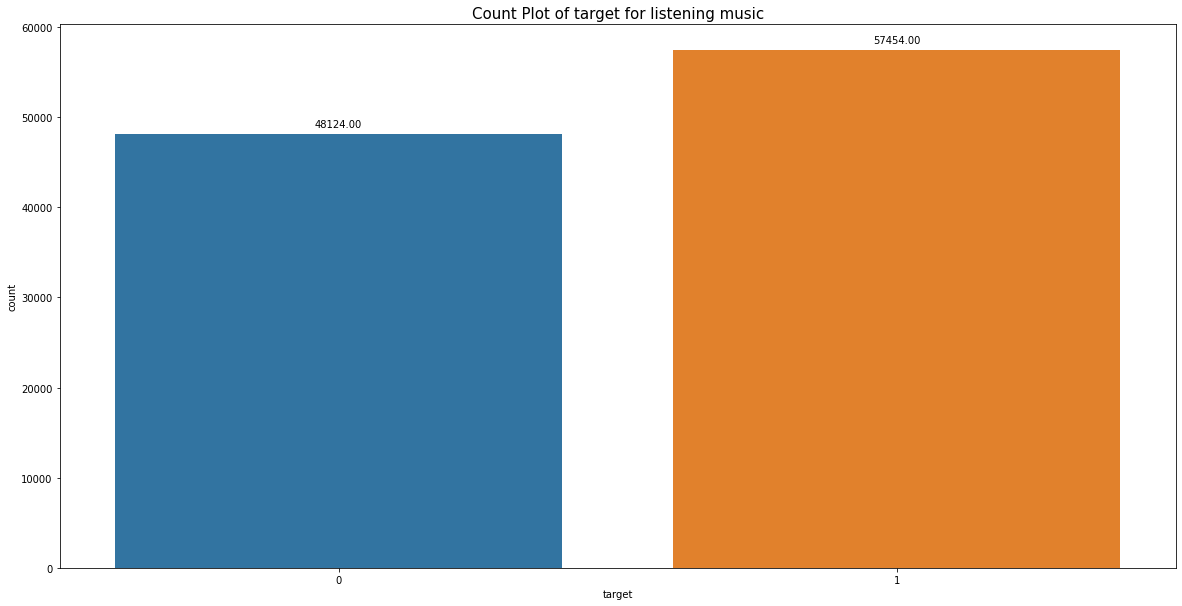

In [ ]:
# creating a plot after removing null values for target.

plt.figure(figsize=(20, 10))
plot = sns.countplot(x = 'target', data = removed_null_data)
plt.title("Count Plot of target for listening music", fontsize = 15)

for p in plot.patches:
  plot.annotate(format(p.get_height(), '.2f'),
                (p.get_x() + p.get_width() / 2. ,
                 p.get_height()),
                ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

Insight:
- as we can see in plot, The target 0 gets reduced if we remove the null values completely from tha dataset.

### checking removed_null_values with 'label_encoding':

In [ ]:
label_encoding(removed_null_data)

user_id
song_id
source_system_tab
source_screen_name
source_type
gender
artist_name
composer
lyricist
genre_ids
language
song_length


,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_liricist
0,6362,1672,3,7,3,1,13,24,0,9,...,485,40,654,1020,977,1,1,1,1,1
1,9596,1672,0,2,6,1,15,18,1,4,...,485,40,654,1020,977,1,1,1,1,1
2,5676,1672,3,7,3,1,13,34,1,9,...,485,40,654,1020,977,1,1,1,1,1
3,5136,1672,6,13,8,1,21,20,0,7,...,485,40,654,1020,977,1,1,1,1,1
4,7316,1672,3,7,3,1,13,19,1,4,...,485,40,654,1020,977,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191782,6112,681,0,0,0,0,4,26,1,4,...,1077,43,540,1364,1316,2,1,1,1,1
191789,1440,1626,6,0,0,1,5,25,1,9,...,1147,43,662,347,291,7,1,1,1,1
191791,709,1737,3,7,3,0,4,30,0,9,...,843,40,704,1269,1018,1,1,1,1,1
191792,6709,184,3,7,3,1,13,39,1,3,...,184,43,816,1213,1166,1,1,1,1,1


### 3. Making a new label as missing:

our 3rd step to handle missing values is add a new category as missing in the column.

In [ ]:
missing_label_merged_data = merged_music_data.copy()

for col in missing_label_merged_data.columns:
  if col != 'language':
    missing_label_merged_data[col].fillna('missing', inplace = True)
  else:
    missing_label_merged_data[col].fillna(0, inplace = True)

In [ ]:
missing_label_merged_data.isnull().sum()

user_id                         0
song_id                         0
source_system_tab               0
source_screen_name              0
source_type                     0
target                          0
city                            0
bd                              0
gender                          0
registered_via                  0
registration_year               0
registration_expire_year        0
registraion_month               0
expiration_month                0
registration_date               0
registration_expiration_date    0
song_length                     0
genre_ids                       0
artist_name                     0
composer                        0
lyricist                        0
language                        0
count_of_genre_ids              0
count_of_artist                 0
count_of_composer               0
count_of_liricist               0
dtype: int64

In [ ]:
missing_label_merged_data.head(20)

,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_liricist
0,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,1,13,24,female,9,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
1,pouJqjNRmZOnRNzzMWWkamTKkIGHyvhl/jo4HgbncnM=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,discover,Discover Chart,online-playlist,1,15,18,male,4,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
2,ULaS7iTeNVqlI45nQEFyye+QRhPy1TvABDDu8AXool0=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,1,13,34,male,9,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
3,RPLdWVYe6joZEnv9TzljsdCWMtKopKpRXk1hKAnQQCQ=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,search,Search,song,1,21,20,female,7,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
4,dEK1cVfdGaKd5ihXxCzf1HbZjR8+JdTYvfHFEnNz3cQ=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,1,13,19,male,4,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
5,GdtjMBKkoLch5LCAHQdRiA0HJlngEEJzGNfkQjGmqQw=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,discover,Online playlist more,online-playlist,1,15,27,male,7,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
6,8Nlr1MyF+XUilQ4z9Cv6Re9qQIYwa5rCi90flRoyDv0=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,discover,Online playlist more,online-playlist,1,15,41,male,3,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
7,CL91UAbjYfhlEg1Yjh10QStr0liu9B/yImCGHlpiEMI=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,discover,Discover Chart,online-playlist,1,22,28,female,7,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
8,Eaq21N7ijazDjnqU5v1jjWewJopGxgZxkKr4GIq7JTs=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Search Trends,song,0,5,27,male,9,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1
9,pNPe9+kUnGJem0nHfYPdQ/Jx5yNlGLTJLshSohjkSdA=,reXuGcEWDDCnL0K3Th//3DFG4S1ACSpJMzA+CFipo1g=,my library,Local playlist more,local-library,0,12,46,female,9,...,219324,458,å‘¨æ¹¯è±ª (NICKTHEREAL),å‘¨æ¹¯è±ª,å‘¨æ¹¯è±ª\å´”æƒŸæ¥·,3,1,1,1,1


In [ ]:
label_encoding(missing_label_merged_data)

user_id
song_id
source_system_tab
source_screen_name
source_type
gender
artist_name
composer
lyricist
genre_ids
language
song_length


,user_id,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_liricist
0,6956,5401,4,7,3,1,13,24,0,9,...,1691,81,2425,2328,1029,1,1,1,1,1
1,10476,5401,0,2,7,1,15,18,1,4,...,1691,81,2425,2328,1029,1,1,1,1,1
2,6219,5401,4,7,3,1,13,34,1,9,...,1691,81,2425,2328,1029,1,1,1,1,1
3,5615,5401,7,14,9,1,21,20,0,7,...,1691,81,2425,2328,1029,1,1,1,1,1
4,7997,5401,4,7,3,1,13,19,1,4,...,1691,81,2425,2328,1029,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191794,9349,5414,7,1,11,0,4,26,1,4,...,384,73,569,2112,820,3,1,1,0,0
191795,10745,3080,0,14,9,1,1,14,1,4,...,2479,84,2751,2112,820,1,1,1,0,0
191796,6680,5981,0,14,9,0,1,26,1,4,...,1556,84,2118,2120,826,3,1,1,1,1
191797,1013,5855,0,4,7,0,5,32,2,4,...,4084,84,455,575,820,8,1,1,5,0


# Implementing Model:


*   We will be using 'AUC Score' for selecting the model as it is metrics, which is used on Kaggle.



In [ ]:
# here, we are droping 'target' column from train_mode, removed_null & missing_label:

from sklearn.model_selection import train_test_split
import math 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, ConfusionMatrixDisplay

x_train_mode, x_test_mode, y_train_mode, y_test_mode = train_test_split(mode_merged_data.drop(['target'],
                                                                                              axis = 1),
                                                      mode_merged_data['target'],test_size = 0.20, random_state = 40)

x_train_removed_null, x_test_removed_null, y_train_removed_null, y_test_removed_null = train_test_split(removed_null_data.drop(['target'],
                                                                                                                               axis = 1),
                                                                       removed_null_data['target'], test_size = 0.20,random_state = 40)

x_train_missing_label, x_test_missing_label, y_train_missing_label, y_test_missing_label = train_test_split(missing_label_merged_data.drop(['target'],
                                                                                                                                           axis = 1),
                                                                                missing_label_merged_data['target'], test_size=0.20, random_state = 40)


In [ ]:
x_train_mode.head()

,user_id,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,registration_year,...,song_length,genre_ids,artist_name,composer,lyricist,language,count_of_genre_ids,count_of_artist,count_of_composer,count_of_liricist
153381,1374,5256,5,13,7,12,38,1,9,2007,...,2858,84,1106,1207,1207,8,1,1,2,0
45201,7062,6136,6,10,6,15,19,1,4,2016,...,882,84,3017,2758,1416,1,0,1,1,1
71318,7329,4155,0,10,6,14,22,0,9,2013,...,2280,81,2459,2348,1044,1,1,1,1,1
145018,6011,3542,3,7,3,13,29,1,7,2015,...,3485,84,2786,2326,1207,1,1,1,0,0
136195,12345,4654,3,7,4,5,24,0,9,2011,...,2418,84,2659,2514,1196,1,0,1,1,1


# Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

# for mode:
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuaracy on Mode Data: ", roc_auc_score(predict_mode, y_test_mode))

# for remnoved_data:
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

try:
    print("Model Accuracy on Removed Null Data: ", roc_auc_score(predict_removed_null, y_test_removed_null))
except ValueError:
  print("Only One Class Present")


# for new_missing_label:
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing Label Data: ", roc_auc_score(predict_missing_label, y_test_missing_label))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model Accuaracy on Mode Data:  0.5479345372435265


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Model Accuracy on Removed Null Data:  0.581777416031683
Model Accuracy on New Missing Label Data:  0.5585013031736609


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# mlf_run = mlf_api.create_run(project_name = 'music-recommendation-system-API', run_name = 'LogisticRegression-for-model')

In [ ]:
train_dataset = x_train_mode.copy()
train_dataset['targets'] = y_train_mode
train_dataset['predictions'] = model.predict(x_train_mode)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_mode))

In [ ]:
test_dataset = x_test_mode.copy()
test_dataset['targets'] = y_test_mode
test_dataset['predictions'] = model.predict(x_test_mode)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_mode))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_mode.columns)],
#     predictions = train_dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False,
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_mode.columns)],
#     predictions = test_dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False,
# )


In [ ]:
y_predict = model.predict(x_test_mode)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_mode, y_predict),
    "Precision" : precision_score(y_test_mode, y_predict),
    "Recall" : recall_score(y_test_mode, y_predict),
}

metrics_dict
# mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.5535714285714286,
 'Precision': 0.5532287513507471,
 'Recall': 0.7430187168451606}

In [ ]:
# mlf_run.log_model(model, framework = mlf.ModelFramework.SKLEARN)
# mlf.run.log_params(model.get_params())

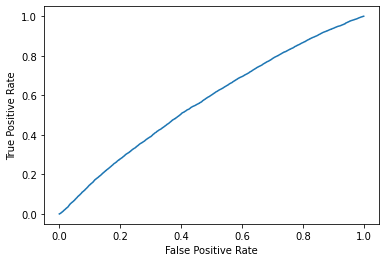

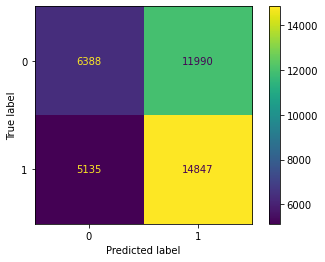

In [ ]:
y_pred_proba = model.predict_proba(x_test_mode)[:,1]

fpr, tpr, _ = roc_curve(y_test_mode, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
# mlf_run.log_plots({"roc-curve" : plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_mode, model.predict(x_test_mode))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
# mlf_run.log_plots({"confusion-matrix":plt}, step=1)

# mlf_run.end()

In [ ]:
# mlf_run = mlf_api.create_run(project_name = 'music-recommendation-system-API', run_name = 'LOGISTIC-REGRESSION_for_removed_data')

In [ ]:
train_dataset = x_train_removed_null.copy()
train_dataset['targets'] = y_train_removed_null
train_dataset['predictions'] = model.predict(x_train_removed_null)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_removed_null)) 

In [ ]:
test_dataset = x_test_removed_null.copy()
test_dataset['targets'] = y_test_removed_null
test_dataset['predictions'] = model.predict(x_test_removed_null)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_removed_null)) 

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_removed_null.columns)],
#     predictions = train_dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False,
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_removed_null.columns)],
#     predictions = test_dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False,
# )

In [ ]:
y_predict = model.predict(x_test_removed_null)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_removed_null, y_predict),
    "Precision" : precision_score(y_test_removed_null, y_predict),
    "Recall" : recall_score(y_test_removed_null, y_predict),
}

metrics_dict

# mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.5295510513354802,
 'Precision': 0.6049076371657017,
 'Recall': 0.38303072625698326}

In [ ]:
# mlf_run.log_model(model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(model.get_params())

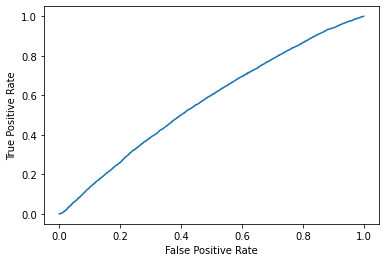

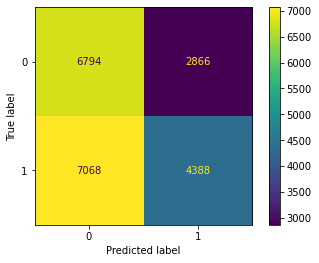

In [ ]:
y_pred_proba = model.predict_proba(x_test_removed_null) [:,1]

fpr, tpr, _ = roc_curve(y_test_removed_null, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"Roc-Curve" : plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_removed_null, model.predict(x_test_removed_null))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({"Confusion-matrix" : plt}, step=1)

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name='music-recommendation-system', run_name='Logistic-Regression-for-new-missing-label')

In [ ]:
train_dataset = x_train_missing_label.copy()
train_dataset['targets'] = y_train_missing_label
train_dataset['predictions'] = model.predict(x_train_missing_label)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_missing_label))

In [ ]:
test_dataset = x_test_missing_label.copy()
test_dataset['targets'] = y_test_missing_label
test_dataset['predictions'] = model.predict(x_test_missing_label)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_missing_label))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_missing_label.columns)],
#     predictions = test_dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False,
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_missing_label.columns)],
#     predictions = train_dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False,
# )

In [ ]:
y_predict = model.predict(x_test_missing_label)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_missing_label, y_predict),
    "Precision" : precision_score(y_test_missing_label, y_predict),
    "Recall" : recall_score(y_test_missing_label, y_predict),
}

metrics_dict

#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.5600625651720542,
 'Precision': 0.5647191198533089,
 'Recall': 0.6781603443098789}

In [ ]:
# mlf_run.log_model(model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(model.get_params())

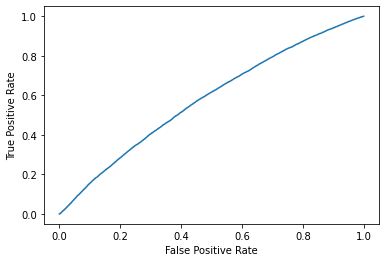

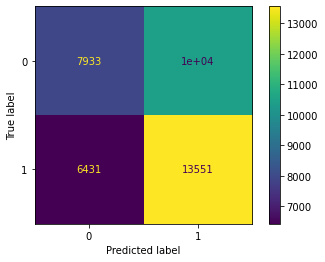

In [ ]:
y_pred_proba = model.predict_proba(x_test_missing_label) [:, 1]

fpr, tpr, _ = roc_curve(y_test_missing_label, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"roc-curve" : plt}, step=1)

mat = confusion_matrix(y_test_missing_label, model.predict(x_test_missing_label))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({"confusion-metrix":plt}, step=1)

#mlf_run.end()

# Decision Tree Classifier:

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

# for mode:
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy On mode Data: ", roc_auc_score(predict_mode, y_test_mode))

# for removed_data:
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

try:
  print("Model Accuracy on Removed Null Data: ", roc_auc_score(predict_removed_null, y_test_removed_null))
except ValueError:
  print("Only One CLass Present")

# for new_missing_label:
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing label Data: ", roc_auc_score(predict_missing_label, y_test_missing_label))

Model Accuracy On mode Data:  0.574048222410892
Model Accuracy on Removed Null Data:  0.5691389017814927
Model Accuracy on New Missing label Data:  0.5732874143262634


In [ ]:
# mlf_run = mlf_api.create_run(project_name = 'music-recommendation-system-API', run_name = 'Decision-Tree-Classifier-for-model')

In [ ]:
train_dataset = x_train_mode.copy()
train_dataset['targets'] = y_train_mode
train_dataset['predictions'] = model.predict(x_train_mode)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_mode))

In [ ]:
test_dataset = x_test_mode.copy()
test_dataset['targets'] = y_test_mode
test_dataset['predictions'] = model.predict(x_test_mode)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_mode))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_mode.columns)],
#     predictions = train_dataset['predictions'],
#     actuals = train_dataset['target'],
#     only_stats = False,
# )

In [ ]:
y_predict = model.predict(x_test_mode)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_mode, y_predict),
    "Precision" : precision_score(y_test_mode, y_predict),
    "Recall"  : recall_score(y_test_mode, y_predict)
}
metrics_dict
# mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.541058394160584,
 'Precision': 0.5635323675629443,
 'Recall': 0.5275748173356021}

In [ ]:
# mlf_run.log_model(model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(model.get_params())

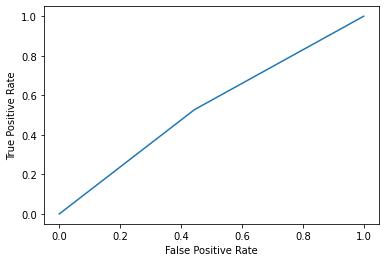

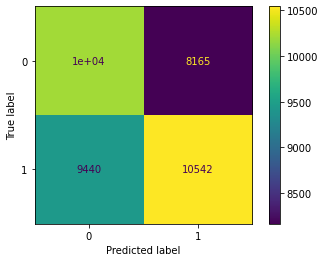

In [ ]:
y_pred_proba = model.predict_proba(x_test_mode)[:, 1]

fpr, tpr, _ = roc_curve(y_test_mode, y_pred_proba)

# create ROC Curve:
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"roc-curve" : plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_mode, model.predict(x_test_mode))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({"confusion-matrix" : plt}, step=1)

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name = 'music-recommendation-system-API', run_name = "Decision-Tree-Classifier-for-removed-data")

In [ ]:
train_dataset = x_train_removed_null.copy()
train_dataset['targets'] = y_train_removed_null
train_dataset['predictions'] = model.predict(x_train_removed_null)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_removed_null))

In [ ]:
test_dataset = x_test_removed_null.copy()
test_dataset['targets'] = y_test_removed_null
test_dataset['predictions'] = model.predict(x_test_removed_null)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_removed_null))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_removed_null.columns)],
#     predictions = train_dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False,
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_removed_null.columns)],
#     predictions = test_dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False,
# )

In [ ]:
y_predict = model.predict(x_test_removed_null)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_removed_null, y_predict),
    "Precision" :precision_score(y_test_removed_null, y_predict),
    "Recall" : recall_score(y_test_removed_null, y_predict)
}

metrics_dict

#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.5225421481341163,
 'Precision': 0.5793302540415705,
 'Recall': 0.43793645251396646}

In [ ]:
# mlf_run.log_model(model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(model.get_params())

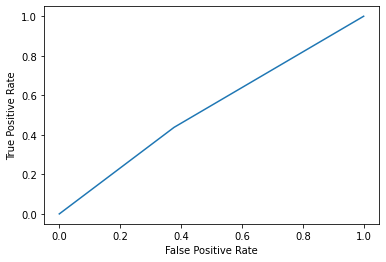

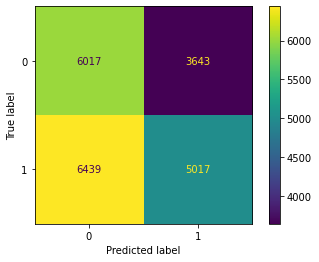

In [ ]:
y_pred_proba = model.predict_proba(x_test_removed_null)[:, 1]

fpr, tpr, _ = roc_curve(y_test_removed_null, y_pred_proba)

# create ROC Curve:
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"roc-curve" : plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_removed_null, model.predict(x_test_removed_null))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({"confusion-matrix" : plt}, step=1)

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name = 'music-recommendation-system-API', run_name = "Decision-Tree-Classifier-for-new_missing_label")

In [ ]:
train_dataset = x_train_missing_label.copy()
train_dataset['targets'] = y_train_missing_label
train_dataset['predictions'] = model.predict(x_train_missing_label)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_missing_label))

In [ ]:
test_dataset = x_test_missing_label.copy()
test_dataset['targets'] = y_test_missing_label
test_dataset['predictions'] = model.predict(x_test_missing_label)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_missing_label))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_missing_label.columns)],
#     predictions = train_dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False,
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_train_missing_label.columns)],
#     predictions = test_dataset['predictions'],
#     actuals = test_dataset['target'],
#     only_stats = False,
# )

In [ ]:
y_predict = model.predict(x_test_missing_label)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_missing_label, y_predict),
    "Precision" :precision_score(y_test_missing_label, y_predict),
    "Recall" : recall_score(y_test_missing_label, y_predict)
}

metrics_dict

#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.5741136600625651,
 'Precision': 0.5907212902583503,
 'Recall': 0.5938844960464418}

In [ ]:
# mlf_run.log_model(model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(model.get_params())

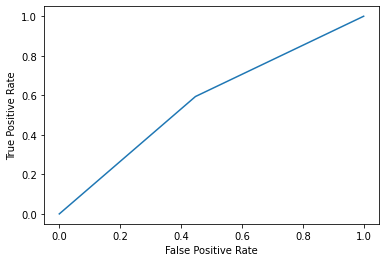

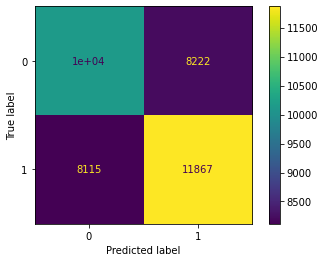

In [ ]:
y_pred_proba = model.predict_proba(x_test_missing_label)[:, 1]

fpr, tpr, _ = roc_curve(y_test_missing_label, y_pred_proba)

# create ROC Curve:
plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"roc-curve" : plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_missing_label, model.predict(x_test_missing_label))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({"confusion-matrix" : plt}, step=1)

#mlf_run.end()

# Random Forest Classifier: 

In [ ]:
# Model Accuracy of Random Forest Classifier for mode, removed_null, missing_label:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()

# for mode:
rf_model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data:: ", accuracy_score(predict_mode, y_test_mode))

# for removed_data:
rf_model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Data: ", accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label:
rf_model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing Label Data: ", accuracy_score(predict_missing_label, y_test_missing_label))

Model Accuracy on Mode Data::  0.541058394160584
Model Accuracy on Removed Data:  0.5225421481341163
Model Accuracy on New Missing Label Data:  0.5741136600625651


In [ ]:
# Model Accuracy with 'n_estimator' of Random Forest Classifier for mode, removed_null, missing_label:

from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators = 200)

# for mode:
rf_model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data:: ", accuracy_score(predict_mode, y_test_mode))

# for removed_data:
rf_model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Data: ", accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label:
rf_model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing Label Data: ", accuracy_score(predict_missing_label, y_test_missing_label))

Model Accuracy on Mode Data::  0.541058394160584
Model Accuracy on Removed Data:  0.5225421481341163
Model Accuracy on New Missing Label Data:  0.5741136600625651


In [ ]:
from yellowbrick.classifier import ROCAUC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf_model.auc

AttributeError: ignored

In [ ]:
# mlf_run = mlf_api.create_run(project_name = 'music-recommendation-system-API', run_name = 'Random-Forest-Classifier-for-mode')

In [ ]:
train_dataset = x_train_mode.copy()
train_dataset['targets'] = y_train_mode
train_dataset['predictions'] = rf_model.predict(x_train_mode)
train_dataset['prediction_probabilities'] = list(rf_model.predict_proba(x_train_mode))

In [ ]:
test_dataset = x_test_mode.copy()
test_dataset['targets'] = y_test_mode
test_dataset['predictions'] = rf_model.predict(x_test_mode)
test_dataset['prediction_probabilities'] = list(rf_model.predict_proba(x_test_mode))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_mode.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = rf_model.predict(x_test_mode)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_mode, y_predict),
    "Precision" : precision_score(y_test_mode, y_predict),
    "Recall" : recall_score(y_test_mode, y_predict)
}

metrics_dict
#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6452294056308655,
 'Precision': 0.6639399084220816,
 'Recall': 0.6458312481233109}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

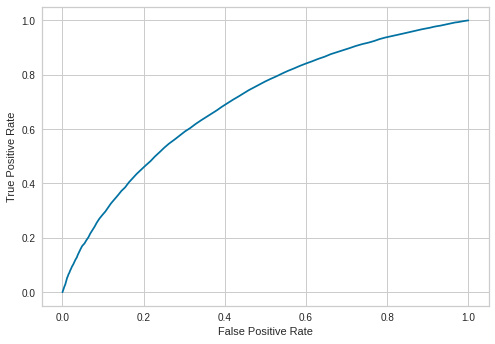

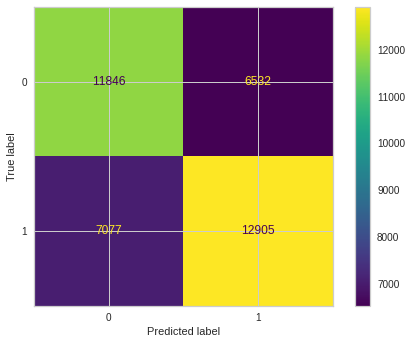

In [ ]:
y_pred_proba = rf_model.predict_proba(x_test_mode) [:, 1]

fpr, tpr, _ = roc_curve(y_test_mode, y_pred_proba)

# create ROC Curve:

plt.plot(fpr, tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
#mlf_run.log_plots({'roc-curve' : plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_mode, rf_model.predict(x_test_mode))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({'confusion-matrix':plt}, step=1)

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name='music-recommendation-system-API', run_name='Random-Forest-Classifier-for-removed-data')

In [ ]:
train_dataset = x_train_removed_null.copy()
train_dataset['targets'] = y_train_removed_null
train_dataset['predictions'] = rf_model.predict(x_train_removed_null)
train_dataset['prediction_probabilities'] = list(rf_model.predict_proba(x_train_removed_null))

In [ ]:
test_dataset = x_test_removed_null.copy()
test_dataset['targets'] = y_test_removed_null
test_dataset['predictions'] = rf_model.predict(x_test_removed_null)
test_dataset['prediction_probabilities'] = list(rf_model.predict_proba(x_test_removed_null))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_removed_null.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_removed_null.columns)],
#     predictions = test__dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = rf_model.predict(x_test_removed_null)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_removed_null, y_predict),
    "Precision" : precision_score(y_test_removed_null, y_predict),
    "Recall" : recall_score(y_test_removed_null, y_predict),
}

metrics_dict
#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6056544800151544,
 'Precision': 0.6976127320954907,
 'Recall': 0.4821054469273743}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

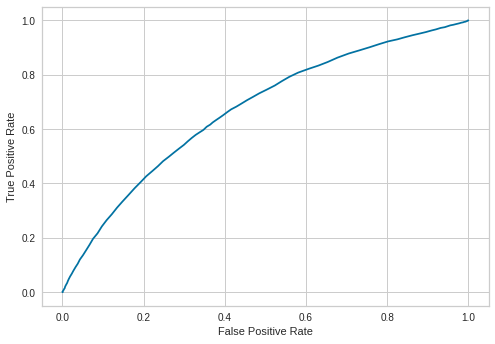

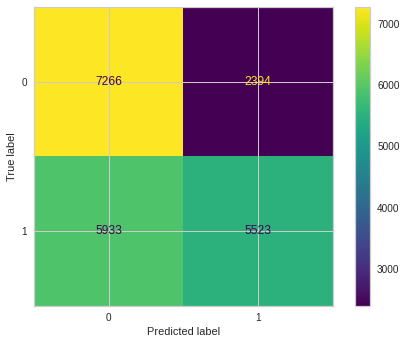

In [ ]:
y_pred_proba = rf_model.predict_proba(x_test_removed_null)[:,1]

fpr, tpr, _ = roc_curve(y_test_removed_null, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"roc-curve" : plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_removed_null, rf_model.predict(x_test_removed_null))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({'confussion-matrix' : plt}, step=1)

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name='music-recommendation-system-API', run_name='Random-Forest-Classifier-for-new-missing-label')

In [ ]:
train_dataset = x_train_missing_label.copy()
train_dataset['targets'] = y_train_missing_label
train_dataset['predictions'] = rf_model.predict(x_train_missing_label)
train_dataset['prediction_probabilities'] = list(rf_model.predict_proba(x_train_missing_label))

In [ ]:
test_dataset = x_test_missing_label.copy()
test_dataset['targets'] = y_test_missing_label
test_dataset['predictions'] = rf_model.predict(x_test_missing_label)
test_dataset['prediction_probabilities'] = list(rf_model.predict_proba(x_test_missing_label))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_missing_label.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_missing_label.columns)],
#     predictions = test__dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = rf_model.predict(x_test_missing_label)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_missing_label, y_predict),
    "Precision" : precision_score(y_test_missing_label, y_predict),
    "Recall" : recall_score(y_test_missing_label, y_predict),
}
metrics_dict

# mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6541449426485922,
 'Precision': 0.6558076940925333,
 'Recall': 0.7072365128615754}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

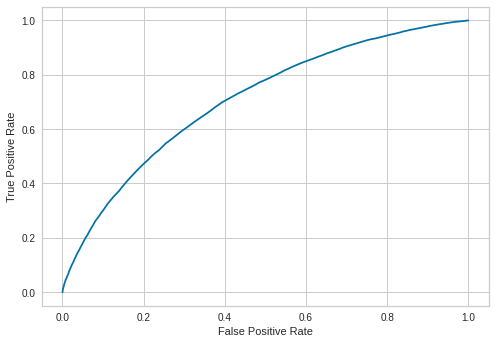

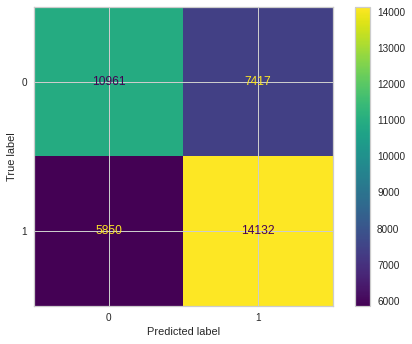

In [ ]:
y_pred_proba = rf_model.predict_proba(x_test_missing_label)[:,1]

fpr, tpr, _ = roc_curve(y_test_missing_label, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"roc-curve" : plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_missing_label, rf_model.predict(x_test_missing_label))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({"confussion-matrix" : plt}, step=1)

#mlf_run.end()

## XGB Classifier(XG Boost)

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(enable_categorical=True)

# for mode
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ", accuracy_score(predict_mode, y_test_mode))

# for removed_data:
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ", accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label:
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing Label Data: ", accuracy_score(predict_missing_label, y_test_missing_label))

Model Accuracy on Mode Data:  0.6399374348279457
Model Accuracy on Removed Null Data:  0.6399886342110248
Model Accuracy on New Missing Label Data:  0.6394681960375391


In [ ]:
#mlf_run = mlf_api.create_run(project_name = "music-recommendation-system-API", run_name = 'XGBClassifier-for-model')

In [ ]:
train_dataset = x_train_mode.copy()
train_dataset['targets'] = y_train_mode
train_dataset['predictions'] = model.predict(x_train_mode)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_mode))

In [ ]:
test_dataset = x_test_mode.copy()
test_dataset['targets'] = y_test_mode
test_dataset['predictions'] = model.predict(x_test_mode)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_mode))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_mode.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_mode.columns)],
#     predictions = test__dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = model.predict(x_test_mode)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_mode, y_predict),
    "Precision" : precision_score(y_test_mode, y_predict),
    "Recall" : recall_score(y_test_mode, y_predict),
}

metrics_dict

#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6380083420229405,
 'Precision': 0.6464680442095146,
 'Recall': 0.6732559303373036}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

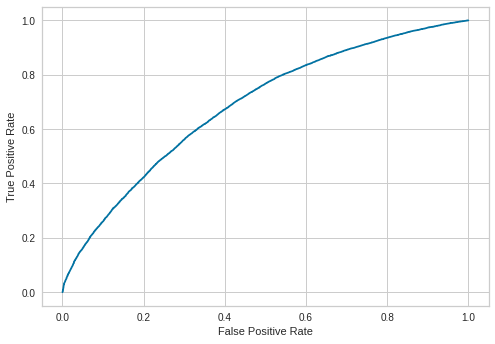

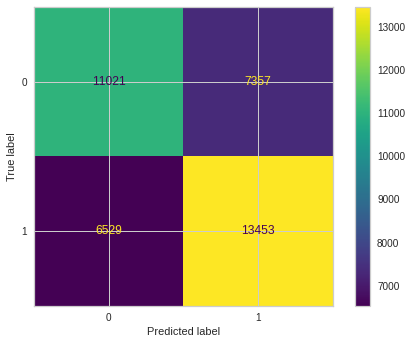

In [ ]:
y_pred_proba = model.predict_proba(x_test_mode) [ :, 1]

fpr, tpr, _ = roc_curve(y_test_mode, y_pred_proba)

# create ROC curve:

plt.plot(fpr,tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"roc-curve"}, step=1)
plt.show()

mat = confusion_matrix(y_test_mode, model.predict(x_test_mode))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name = "music-recommendation-system-API", run_name = 'XGBClassifier-for-removed-data')

In [ ]:
train_dataset = x_train_removed_null.copy()
train_dataset['targets'] = y_train_removed_null
train_dataset['predictions'] = model.predict(x_train_removed_null)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_removed_null))

In [ ]:
test_dataset = x_test_removed_null.copy()
test_dataset['targets'] = y_test_removed_null
test_dataset['predictions'] = model.predict(x_test_removed_null)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_removed_null))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_removed_null.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_removed_null.columns)],
#     predictions = test__dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = model.predict(x_test_removed_null)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_removed_null, y_predict),
    "Precision" : precision_score(y_test_removed_null, y_predict),
    "Recall" : recall_score(y_test_removed_null, y_predict),
}

metrics_dict

# mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6087327145292669,
 'Precision': 0.6554409188242165,
 'Recall': 0.5878142458100558}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

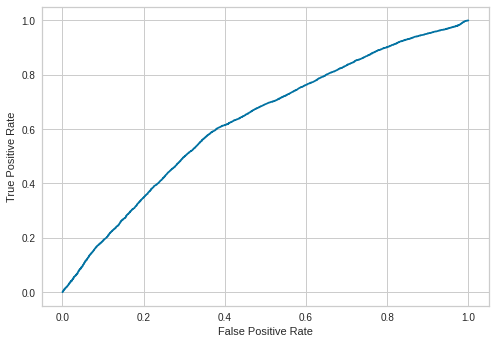

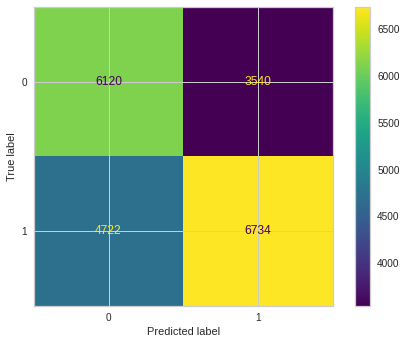

In [ ]:
y_pred_proba = model.predict_proba(x_test_removed_null)[:,1]

fpr, tpr, _ = roc_curve(y_test_removed_null, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({"roc-curve": plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_removed_null, model.predict(x_test_removed_null))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({'confusion-matrix': plt}, step=1)

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name = "music-recommendation-system-API", run_name = 'XGBClassifier-for-new-missing-label')

In [ ]:
train_dataset = x_train_missing_label.copy()
train_dataset['targets'] = y_train_missing_label
train_dataset['predictions'] = model.predict(x_train_missing_label)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_missing_label))

In [ ]:
test_dataset = x_test_missing_label.copy()
test_dataset['targets'] = y_test_missing_label
test_dataset['predictions'] = model.predict(x_test_missing_label)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_missing_label))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_missing_label.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_missing_label.columns)],
#     predictions = test__dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = model.predict(x_test_missing_label)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_missing_label, y_predict),
    "Precision" : precision_score(y_test_missing_label, y_predict),
    "Recall" : recall_score(y_test_missing_label, y_predict),
}

metrics_dict

#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6394681960375391,
 'Precision': 0.6443318318318318,
 'Recall': 0.6872184966469823}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

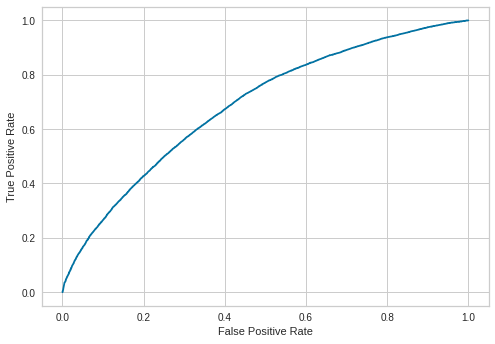

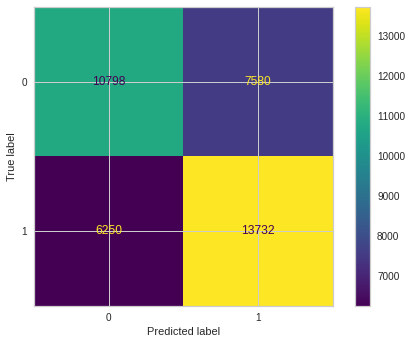

In [ ]:
y_pred_proba = model.predict_proba(x_test_missing_label)[:,1]

fpr, tpr, _ = roc_curve(y_test_missing_label, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({'roc-curve': plt}, step = 1)
plt.show()

mat = confusion_matrix(y_test_missing_label, model.predict(x_test_missing_label))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_plots({'confusion-matrix':plt}, step=1)

#mlf_run.end()

## XGBoost

In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=2)

# for mode:
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ", accuracy_score(predict_mode, y_test_mode))

# for removed_data:
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ", accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label:
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing Label Data: ", accuracy_score(predict_missing_label, y_test_missing_label))

Model Accuracy on Mode Data:  0.6310479666319082
Model Accuracy on Removed Null Data:  0.6211877249479067
Model Accuracy on New Missing Label Data:  0.6329770594369134


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=50)

# for mode:
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ", accuracy_score(predict_mode, y_test_mode))

# for removed_data:
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ", accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label:
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing Label Data: ", accuracy_score(predict_missing_label, y_test_missing_label))


Model Accuracy on Mode Data:  0.6379822732012513
Model Accuracy on Removed Null Data:  0.6367209698806592
Model Accuracy on New Missing Label Data:  0.637043795620438


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(n_estimators=100)

# for mode:
model.fit(x_train_mode, y_train_mode)
predict_mode = model.predict(x_test_mode)

print("Model Accuracy on Mode Data: ", accuracy_score(predict_mode, y_test_mode))

# for removed_data:
model.fit(x_train_removed_null, y_train_removed_null)
predict_removed_null = model.predict(x_test_removed_null)

print("Model Accuracy on Removed Null Data: ", accuracy_score(predict_removed_null, y_test_removed_null))

# for new_missing_label:
model.fit(x_train_missing_label, y_train_missing_label)
predict_missing_label = model.predict(x_test_missing_label)

print("Model Accuracy on New Missing Label Data: ", accuracy_score(predict_missing_label, y_test_missing_label))

Model Accuracy on Mode Data:  0.6399374348279457
Model Accuracy on Removed Null Data:  0.6399886342110248
Model Accuracy on New Missing Label Data:  0.6394681960375391


In [ ]:
#mlf_run = mlf_api.create_run(project_name = "music-recommendation-system-API", run_name = 'XGBClassifier-for-model')

In [ ]:
train_dataset = x_train_mode.copy()
train_dataset['targets'] = y_train_mode
train_dataset['predictions'] = model.predict(x_train_mode)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_mode))

In [ ]:
test_dataset = x_test_mode.copy()
test_dataset['targets'] = y_test_mode
test_dataset['predictions'] = model.predict(x_test_mode)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_mode))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_mode.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_mode.columns)],
#     predictions = test__dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = model.predict(x_test_mode)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_mode, y_predict),
    "Precision" : precision_score(y_test_mode, y_predict),
    "Recall" : recall_score(y_test_mode, y_predict),
}

metrics_dict

#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6380083420229405,
 'Precision': 0.6464680442095146,
 'Recall': 0.6732559303373036}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

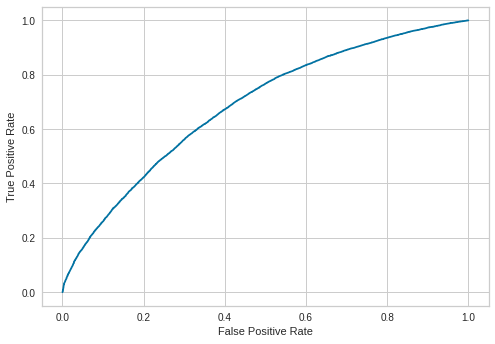

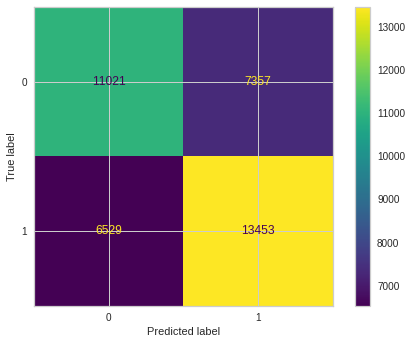

In [ ]:
y_pred_proba = model.predict_proba(x_test_mode)[:, 1]

fpr, tpr, _ = roc_curve(y_test_mode, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({'roc-curve':plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_mode, model.predict(x_test_mode))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_metrics({'confusion-matrix':plt}, step=1)

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name = "music-recommendation-system-API", run_name = 'XGBClassifier-for-removed-data')

In [ ]:
train_dataset = x_train_removed_null.copy()
train_dataset['targets'] = y_train_removed_null
train_dataset['predictions'] = model.predict(x_train_removed_null)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_removed_null))

In [ ]:
test_dataset = x_test_removed_null.copy()
test_dataset['targets'] = y_test_removed_null
test_dataset['predictions'] = model.predict(x_test_removed_null)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_removed_null))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_removed_null.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_removed_null.columns)],
#     predictions = test__dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = model.predict(x_test_removed_null)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_removed_null, y_predict),
    "Precision" : precision_score(y_test_removed_null, y_predict),
    "Recall" : recall_score(y_test_removed_null, y_predict),
}

metrics_dict

#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6087327145292669,
 'Precision': 0.6554409188242165,
 'Recall': 0.5878142458100558}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

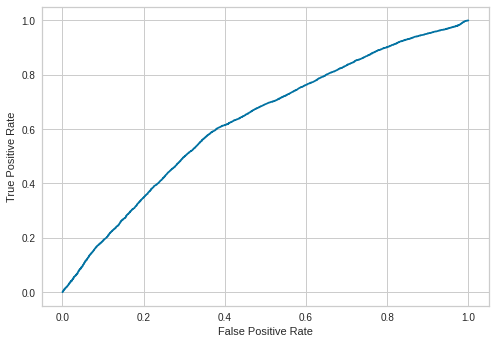

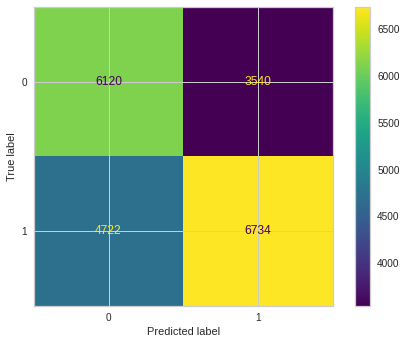

In [ ]:
y_pred_proba = model.predict_proba(x_test_removed_null)[:, 1]

fpr, tpr, _ = roc_curve(y_test_removed_null, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({'roc-curve':plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_removed_null, model.predict(x_test_removed_null))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_metrics({'confusion-matrix':plt}, step=1)

#mlf_run.end()

In [ ]:
#mlf_run = mlf_api.create_run(project_name = "music-recommendation-system-API", run_name = 'XGBClassifier-for-new-missing-label')

In [ ]:
train_dataset = x_train_missing_label.copy()
train_dataset['targets'] = y_train_missing_label
train_dataset['predictions'] = model.predict(x_train_missing_label)
train_dataset['prediction_probabilities'] = list(model.predict_proba(x_train_missing_label))

In [ ]:
test_dataset = x_test_missing_label.copy()
test_dataset['targets'] = y_test_missing_label
test_dataset['predictions'] = model.predict(x_test_missing_label)
test_dataset['prediction_probabilities'] = list(model.predict_proba(x_test_missing_label))

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'train_dataset',
#     features = train_dataset[list(x_train_missing_label.columns)],
#     predictions = train__dataset['predictions'],
#     actuals = train_dataset['targets'],
#     only_stats = False
# )

In [ ]:
# mlf_run.log_dataset(
#     dataset_name = 'test_dataset',
#     features = test_dataset[list(x_test_missing_label.columns)],
#     predictions = test__dataset['predictions'],
#     actuals = test_dataset['targets'],
#     only_stats = False
# )

In [ ]:
y_predict = model.predict(x_test_missing_label)

metrics_dict = {
    "Accuracy" : accuracy_score(y_test_missing_label, y_predict),
    "Precision" : precision_score(y_test_missing_label, y_predict),
    "Recall" : recall_score(y_test_missing_label, y_predict),
}

metrics_dict

#mlf_run.log_metrics(metrics_dict)

{'Accuracy': 0.6394681960375391,
 'Precision': 0.6443318318318318,
 'Recall': 0.6872184966469823}

In [ ]:
# mlf_run.log_model(rf_model, framework = mlf.ModelFramework.SKLEARN)
# mlf_run.log_params(rf_model.get_params())

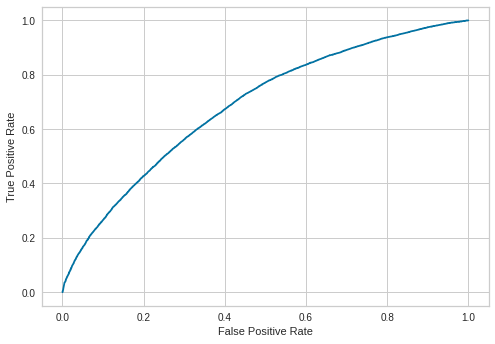

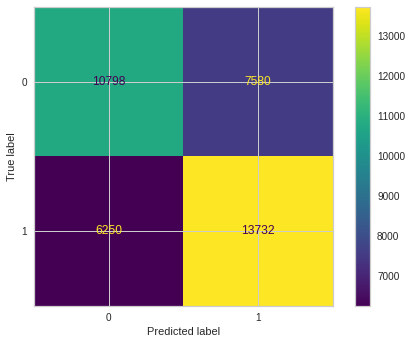

In [ ]:
y_pred_proba = model.predict_proba(x_test_missing_label)[:, 1]

fpr, tpr, _ = roc_curve(y_test_missing_label, y_pred_proba)

# create ROC curve:

plt.plot(fpr, tpr)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
#mlf_run.log_plots({'roc-curve':plt}, step=1)
plt.show()

mat = confusion_matrix(y_test_missing_label, model.predict(x_test_missing_label))
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=mat)
disp.plot()
#mlf_run.log_metrics({'confusion-matrix':plt}, step=1)

#mlf_run.end()

# Feature Importance:

In [ ]:
x_train_missing_label.columns

Index(['user_id', 'song_id', 'source_system_tab', 'source_screen_name',
       'source_type', 'city', 'bd', 'gender', 'registered_via',
       'registration_year', 'registration_expire_year', 'registraion_month',
       'expiration_month', 'registration_date', 'registration_expiration_date',
       'song_length', 'genre_ids', 'artist_name', 'composer', 'lyricist',
       'language', 'count_of_genre_ids', 'count_of_artist',
       'count_of_composer', 'count_of_liricist'],
      dtype='object')

In [ ]:
feature_importance = pd.DataFrame({'Features': x_train_missing_label.columns,
                                   'Importance' : rf_model.feature_importances_})

feature_importance

,Features,Importance
0,user_id,0.101689
1,song_id,0.057235
2,source_system_tab,0.025555
3,source_screen_name,0.038417
4,source_type,0.038570
5,city,0.058408
6,bd,0.077408
7,gender,0.020719
8,registered_via,0.024638
9,registration_year,0.055988


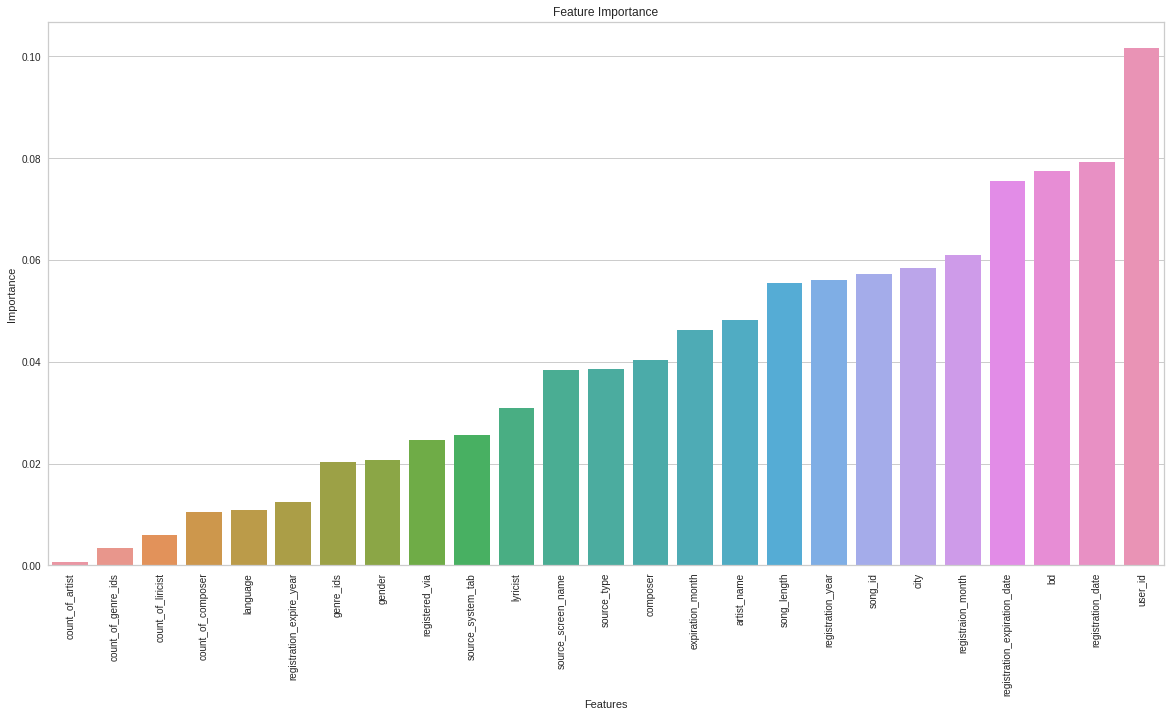

In [ ]:
# creating plot for feature_importance:

plt.figure(figsize=(20,10))

sns.barplot(x=feature_importance['Features'], y=feature_importance['Importance'],
            data = feature_importance, order=feature_importance.sort_values('Importance').Features).set(title='Feature Importance')
plt.xticks(rotation=90)                                                                               
plt.show()
                                                                        

# **Conclution:**

- Looking at the feature importance the user who is listning the song has the highest weightage.
- It's possible that on Registration day and Service Expiration day people use the app more and thus listen to songs on repeat.
- Age(bd) is always a factor as the dataset has a mean age of 17 year and youngsters do listen to more songs.
- Composer and Artist are also important features.   



